# **Chapter 1: Exploratory Data Analysis**

## **Part 1: Installing the environment**

In [1]:
import os
os.chdir("..")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## **Part 2: Survey & USD**

Read the dataset

In [3]:
survey_df = pd.read_csv("data/survey_random.csv", dtype={"Год": int, "Месяц": int})
usd_df = pd.read_csv("data/usd_to_kzt.csv")

In [4]:
health_mapping = {
    'Ужасное': 0,
    'Плохое': 1,
    'Удовлетворительное': 2,
    'Хорошее': 3,
    'Прекрасное': 4
}
gov_med_mapping = {
    'Плохое': 1,
    'Удовлетворительное': 2,
    'Хорошее': 3
}
priv_med_mapping = {
    'Плохое': 1,
    'Удовлетворительное': 2,
    'Хорошее': 3
}

In [5]:
usd_df.columns = usd_df.columns.str.strip()
usd_long = usd_df.melt(
    id_vars=['Год'], 
    value_vars=['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 
                'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь'],
    var_name='month', value_name='USD_KZT'
)
month_map = {
    'Январь': 1, 'Февраль': 2, 'Март': 3, 'Апрель': 4, 'Май': 5, 'Июнь': 6,
    'Июль': 7, 'Август': 8, 'Сентябрь': 9, 'Октябрь': 10, 'Ноябрь': 11, 'Декабрь': 12
}
usd_long['month_num'] = usd_long['month'].map(month_map)
usd_long['year_month'] = usd_long.apply(lambda x: f"{int(x['Год'])}-{x['month_num']:02d}", axis=1)
usd_long['USD_KZT'] = usd_long['USD_KZT'].str.replace(',', '.').astype(float)
usd_long = usd_long[['year_month', 'USD_KZT']]

In [6]:
survey_df['year_month'] = survey_df.apply(
    lambda x: f"{x['Год']}-{x['Месяц']:02d}", axis=1
)

survey_df['health_score'] = survey_df[
    'q10a. В целом как бы Вы оценили свое здоровье в настоящее время?'
].map(health_mapping)
survey_df['gov_med_score'] = survey_df[
    'q9.1. Оцените, пожалуйста, качество медицинских услуг в государственных медицинских учреждениях (поликлиники, больницы) в Казахстане'
].map(gov_med_mapping)
survey_df['priv_med_score'] = survey_df[
    'q9.2. Оцените, пожалуйста, качество медицинских услуг в  частных клиниках в Казахстане'
].map(priv_med_mapping)

monthly_scores = survey_df.groupby('year_month')[
    ['health_score', 'gov_med_score', 'priv_med_score']
].mean().reset_index()

In [7]:
merged_df = pd.merge(monthly_scores, usd_long, on='year_month', how='inner').sort_values('year_month')

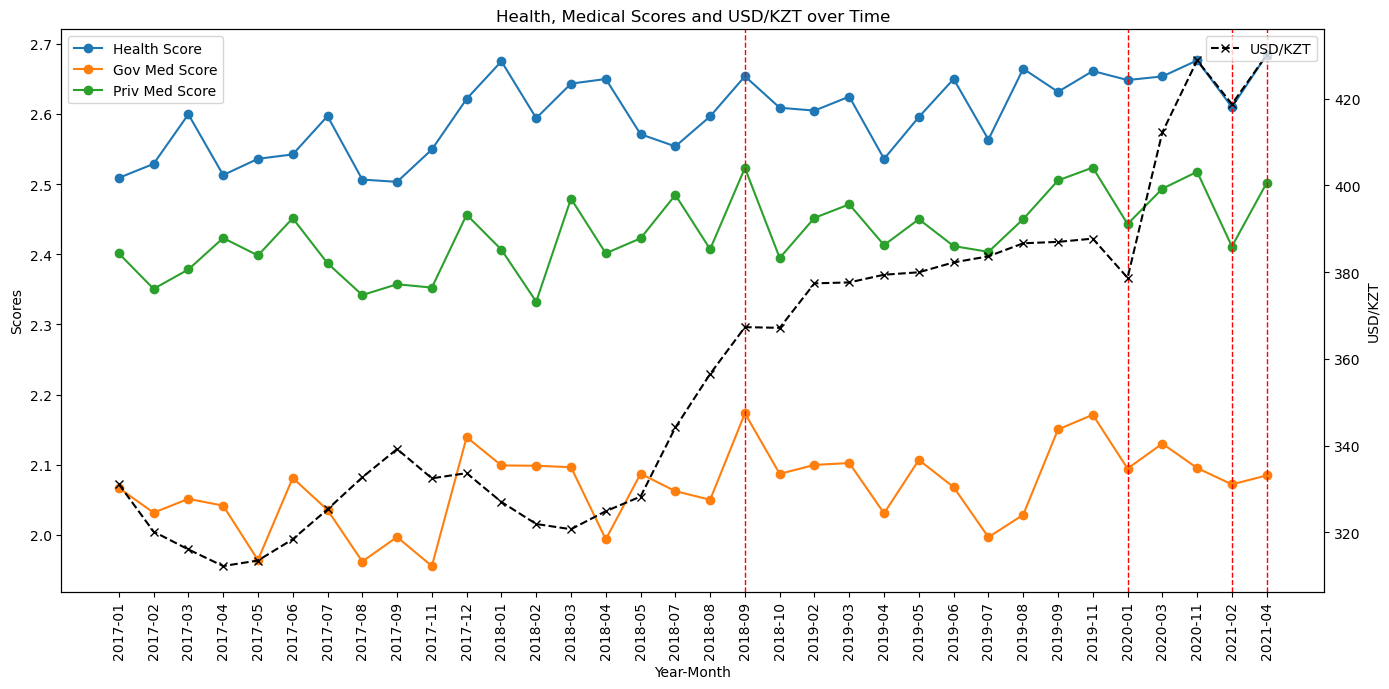

In [8]:
fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.plot(merged_df['year_month'], merged_df['health_score'], label='Health Score', marker='o')
ax1.plot(merged_df['year_month'], merged_df['gov_med_score'], label='Gov Med Score', marker='o')
ax1.plot(merged_df['year_month'], merged_df['priv_med_score'], label='Priv Med Score', marker='o')
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Scores')
ax1.tick_params(axis='x', rotation=90)

ax2 = ax1.twinx()
ax2.plot(merged_df['year_month'], merged_df['USD_KZT'], label='USD/KZT', color='black', linestyle='--', marker='x')
ax2.set_ylabel('USD/KZT')

highlight_months = ['2018-09', '2020-01', '2021-02', '2021-04']
for month in highlight_months:
    if month in merged_df['year_month'].values:
        idx = merged_df[merged_df['year_month'] == month].index[0]
        ax1.axvline(x=merged_df['year_month'].iloc[idx], color='red', linestyle='--', linewidth=1)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Health, Medical Scores and USD/KZT over Time')
plt.tight_layout()
plt.show()

### **Part 2.5: Survey & USD by Facets**

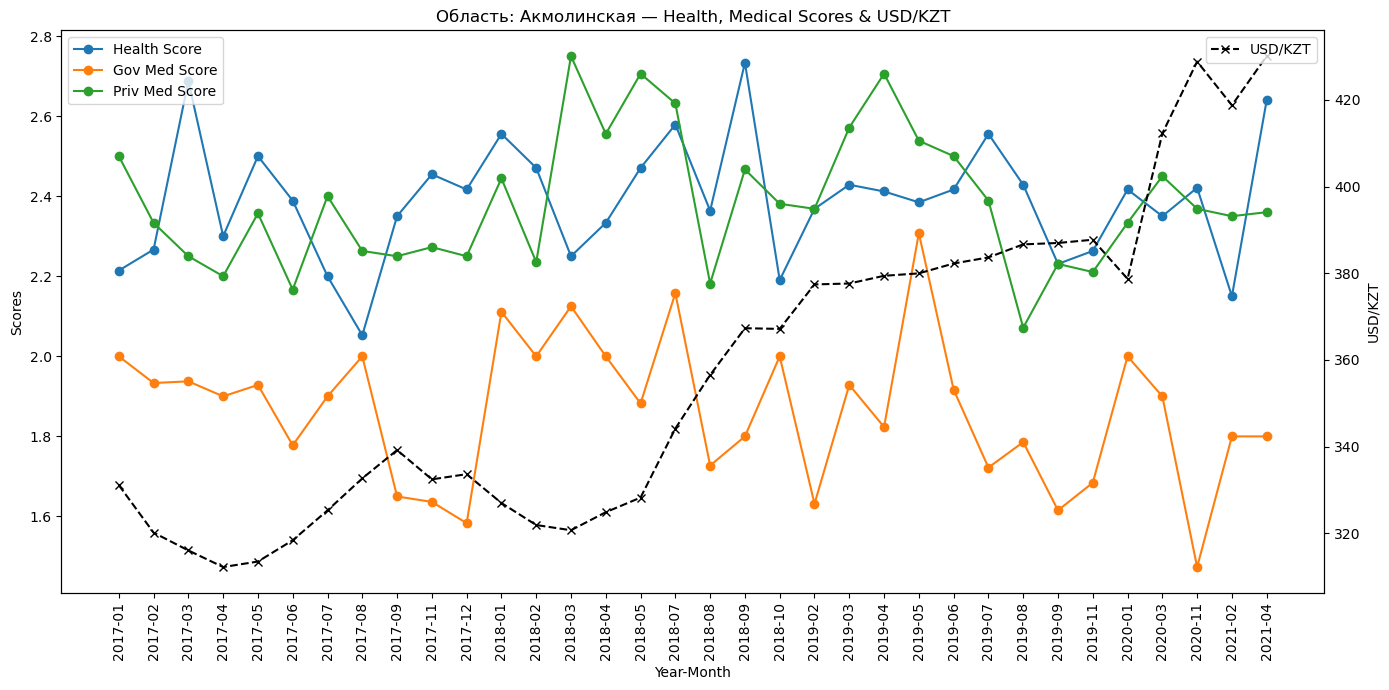

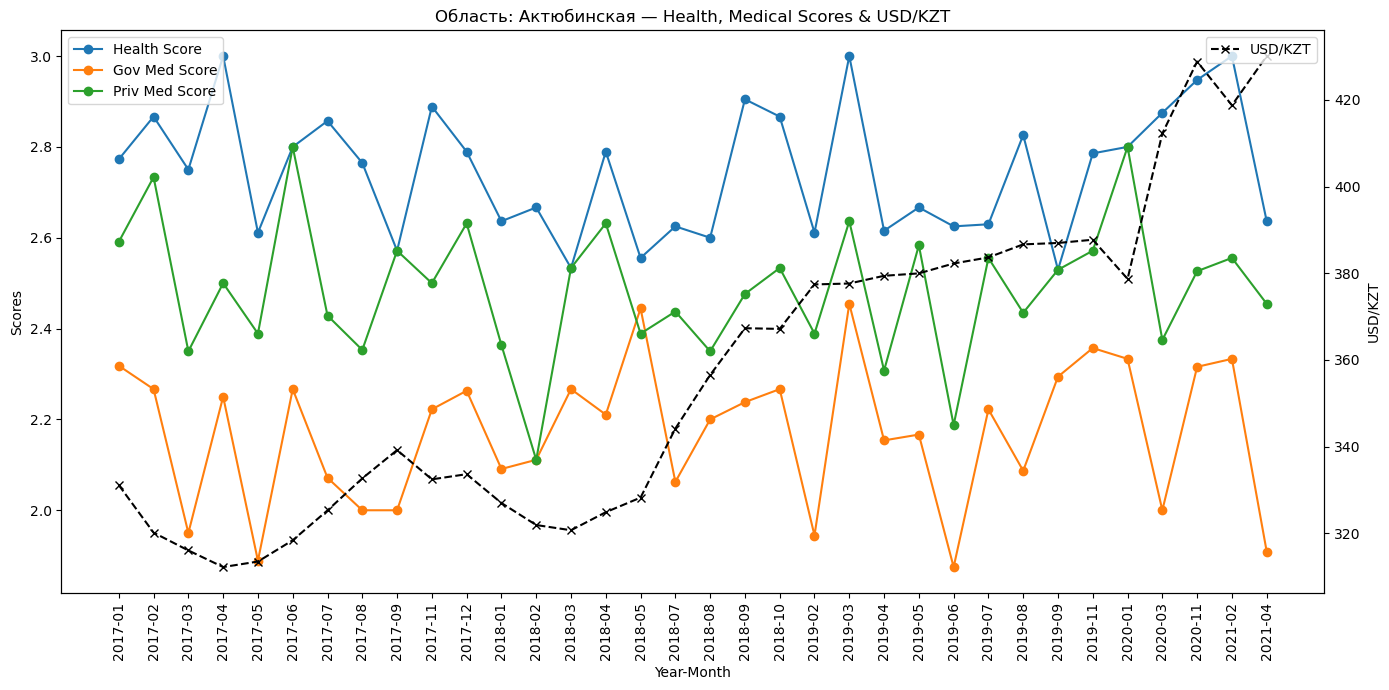

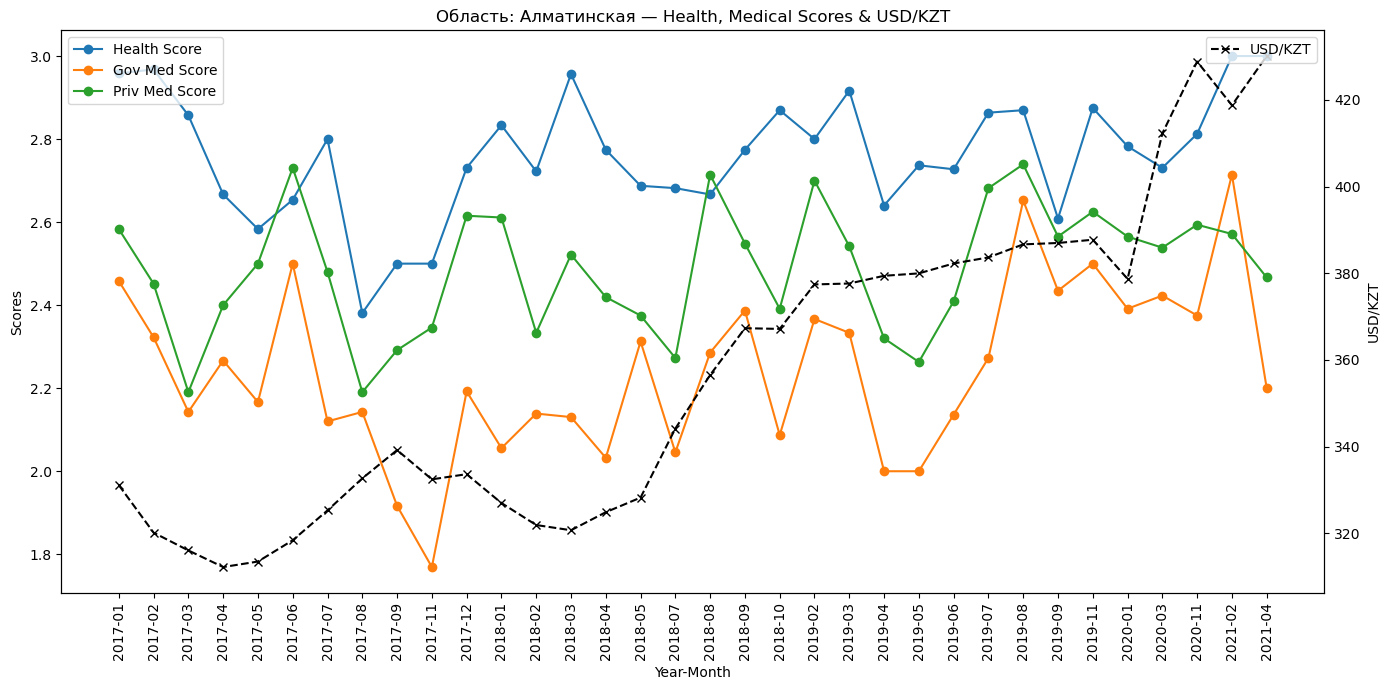

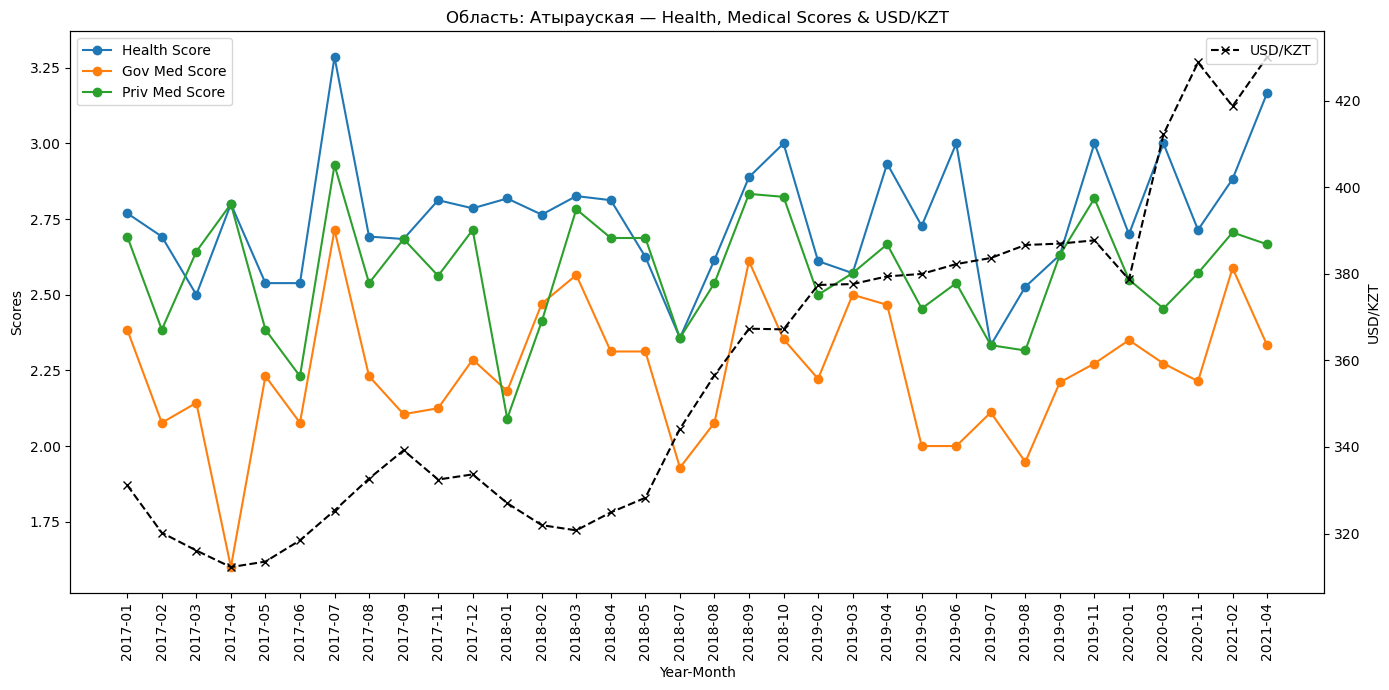

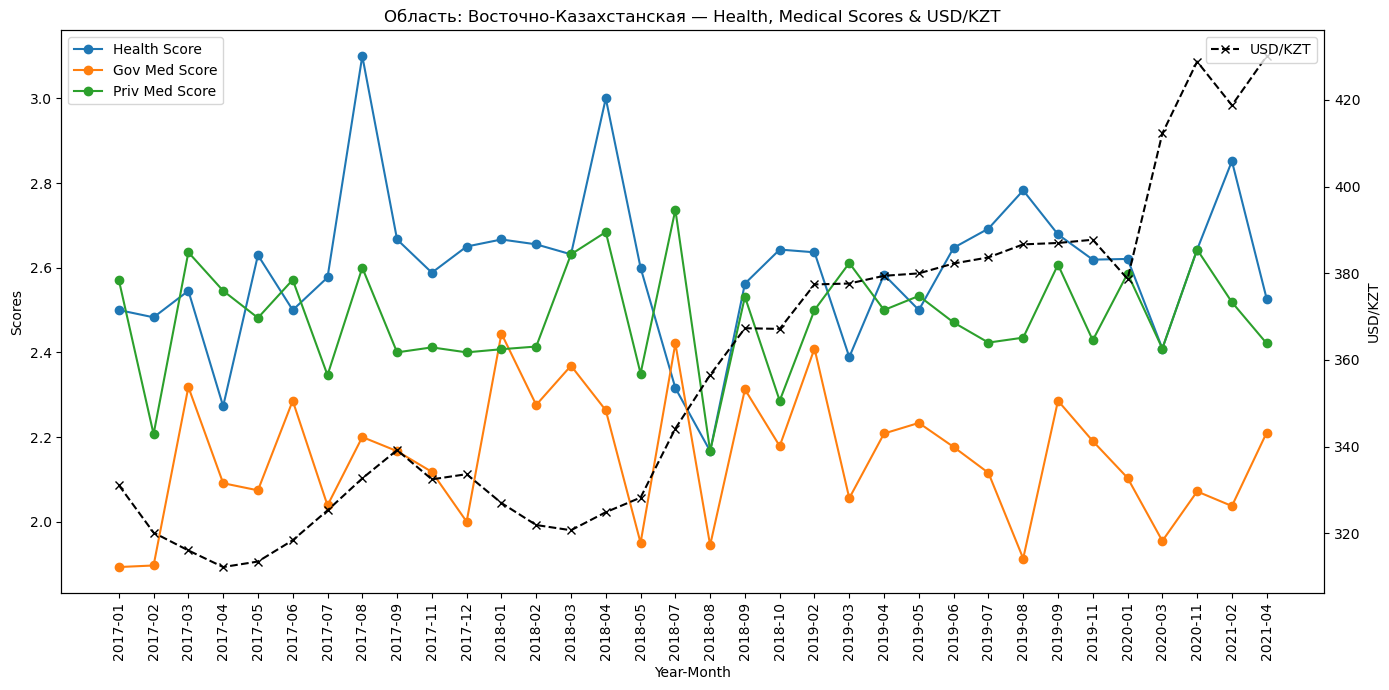

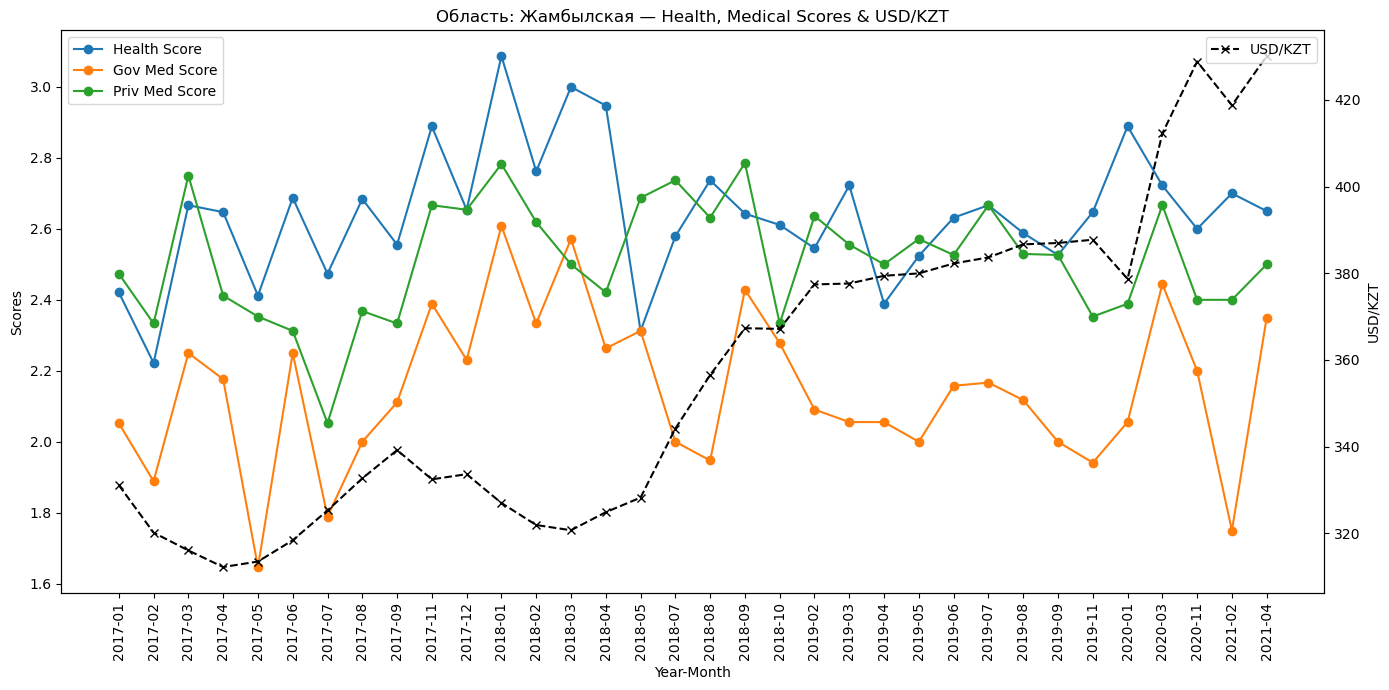

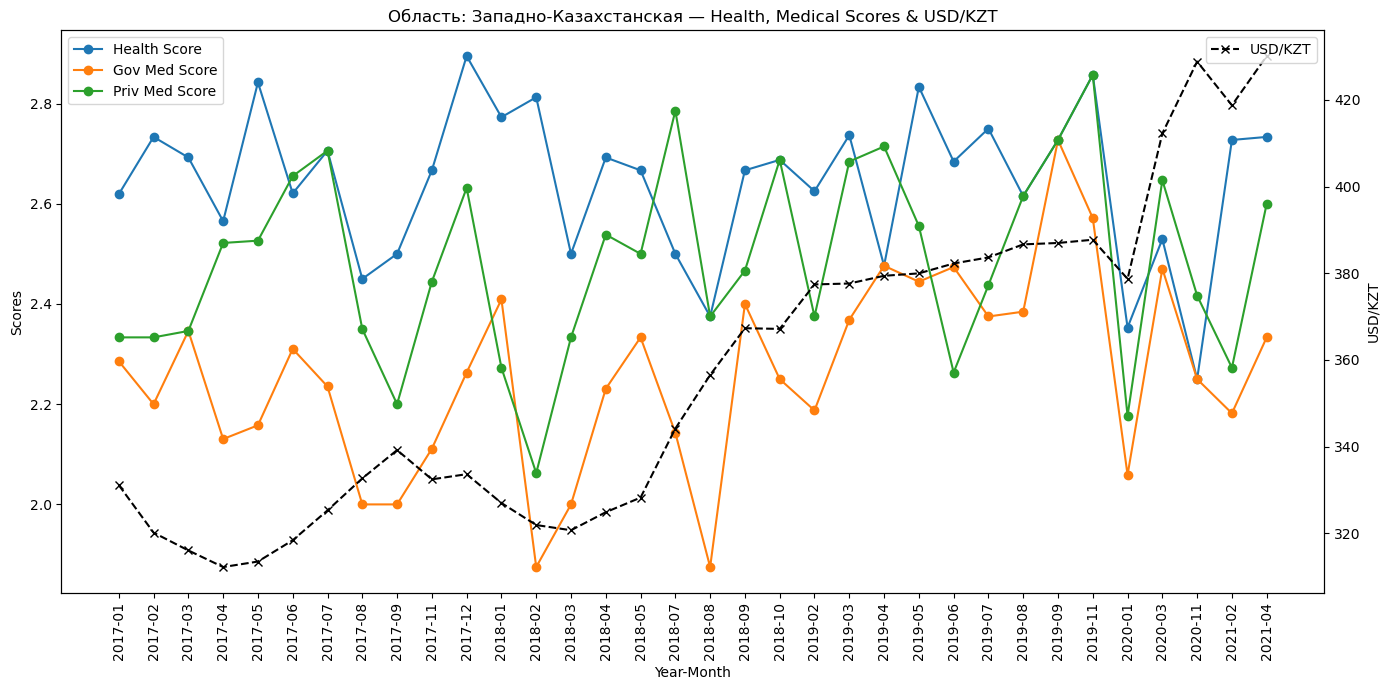

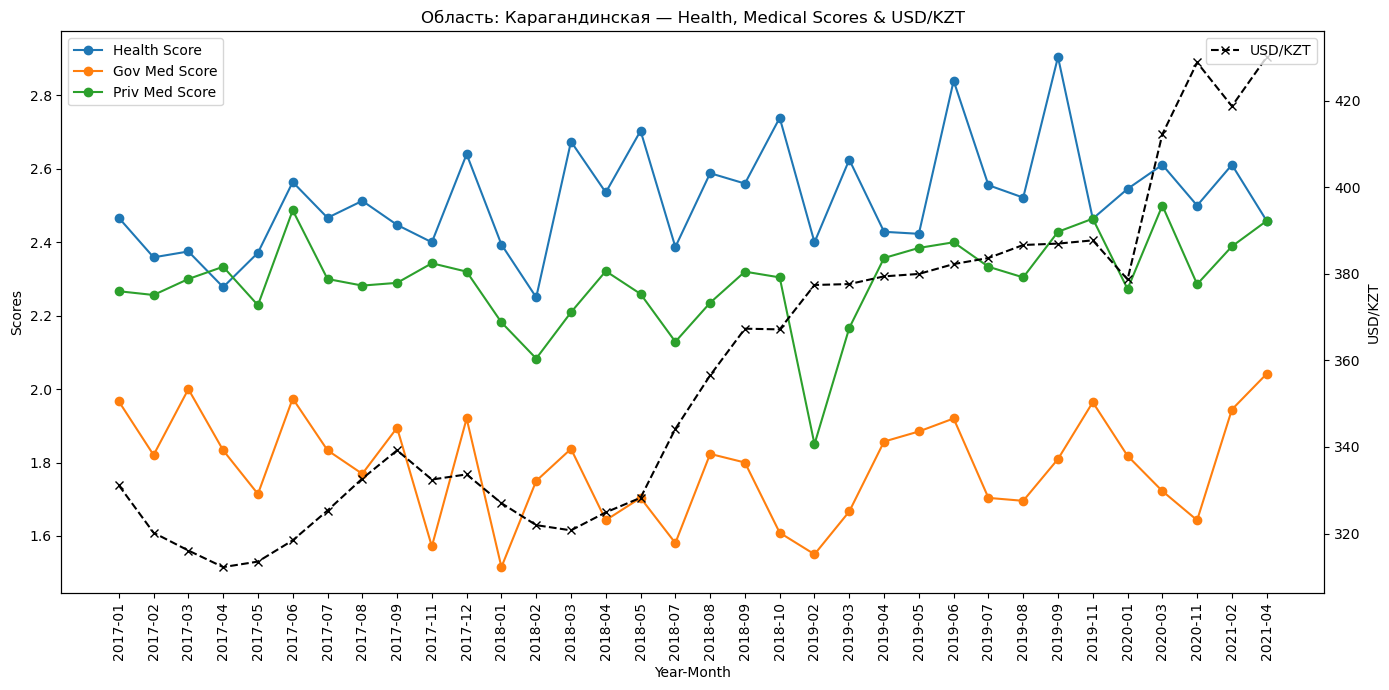

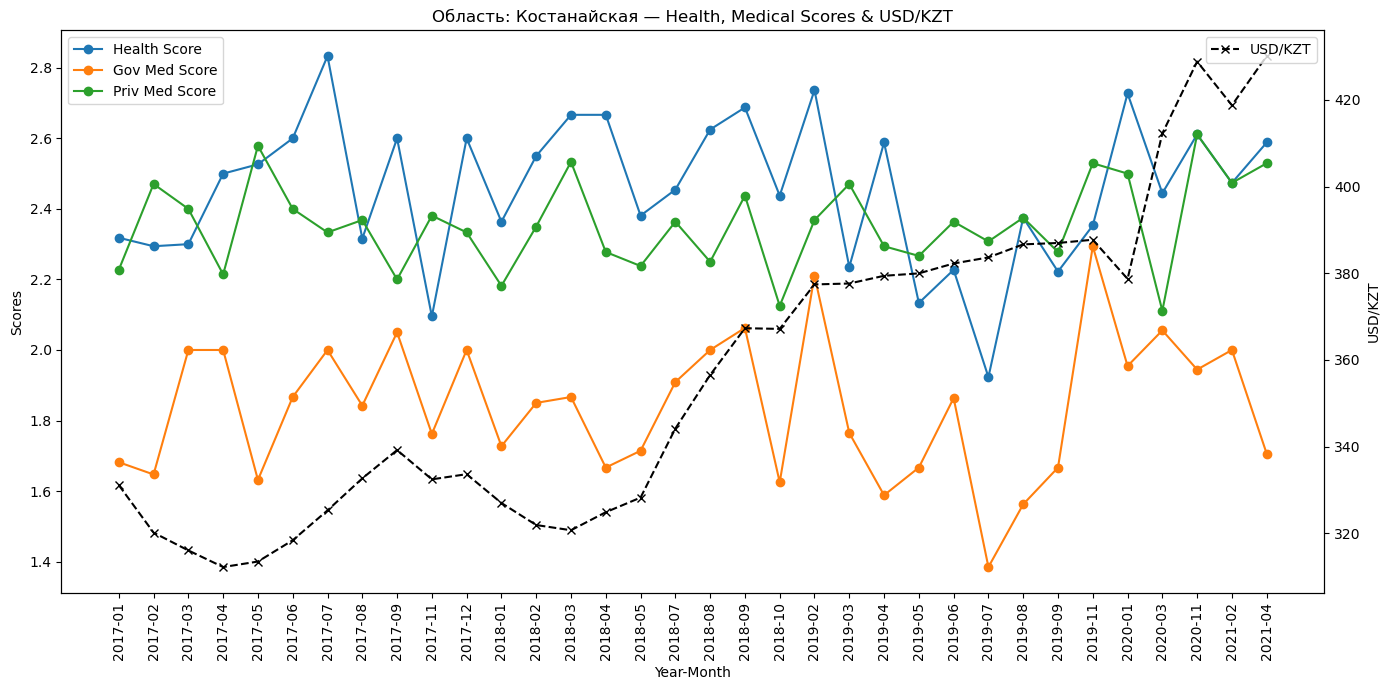

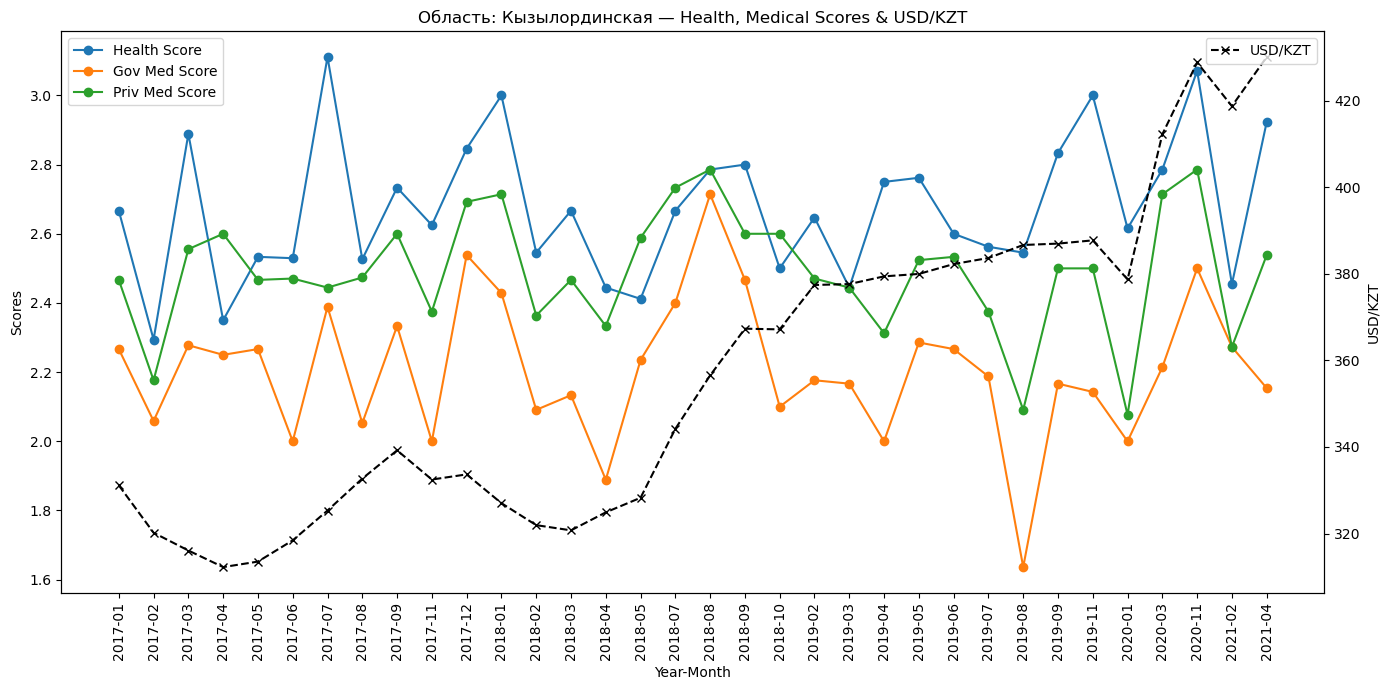

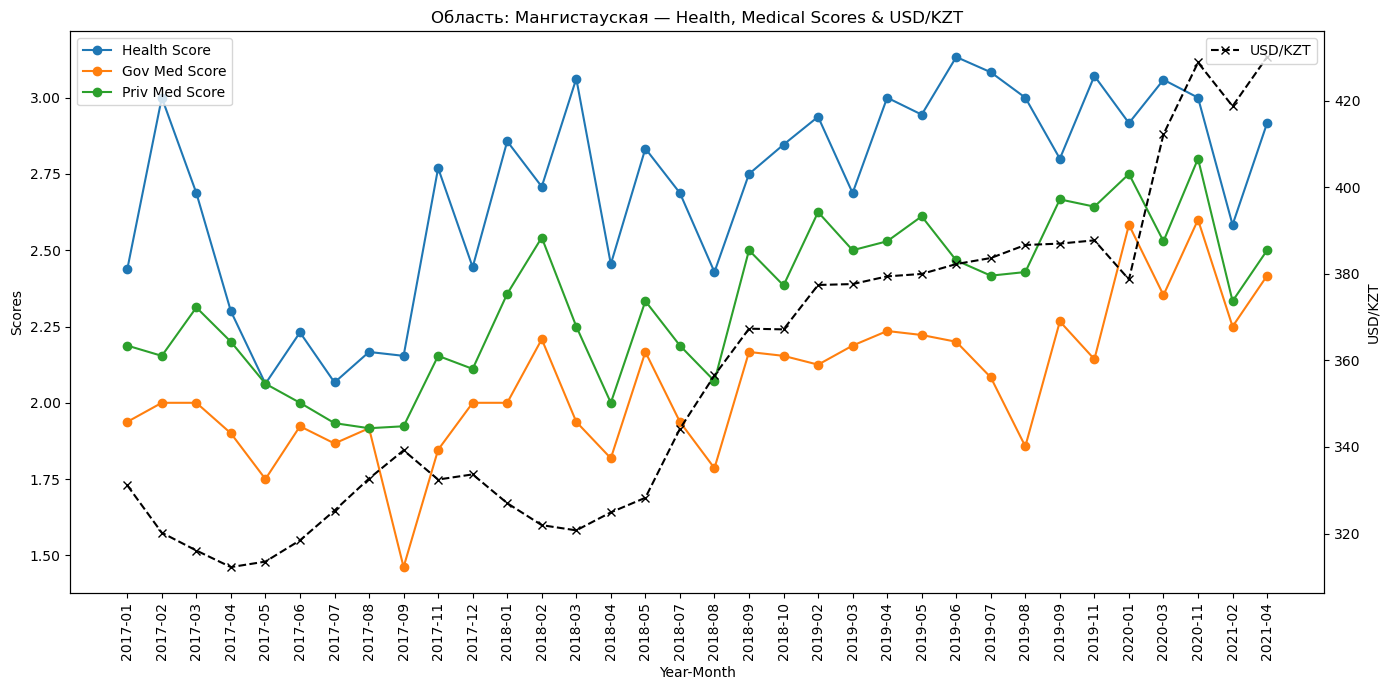

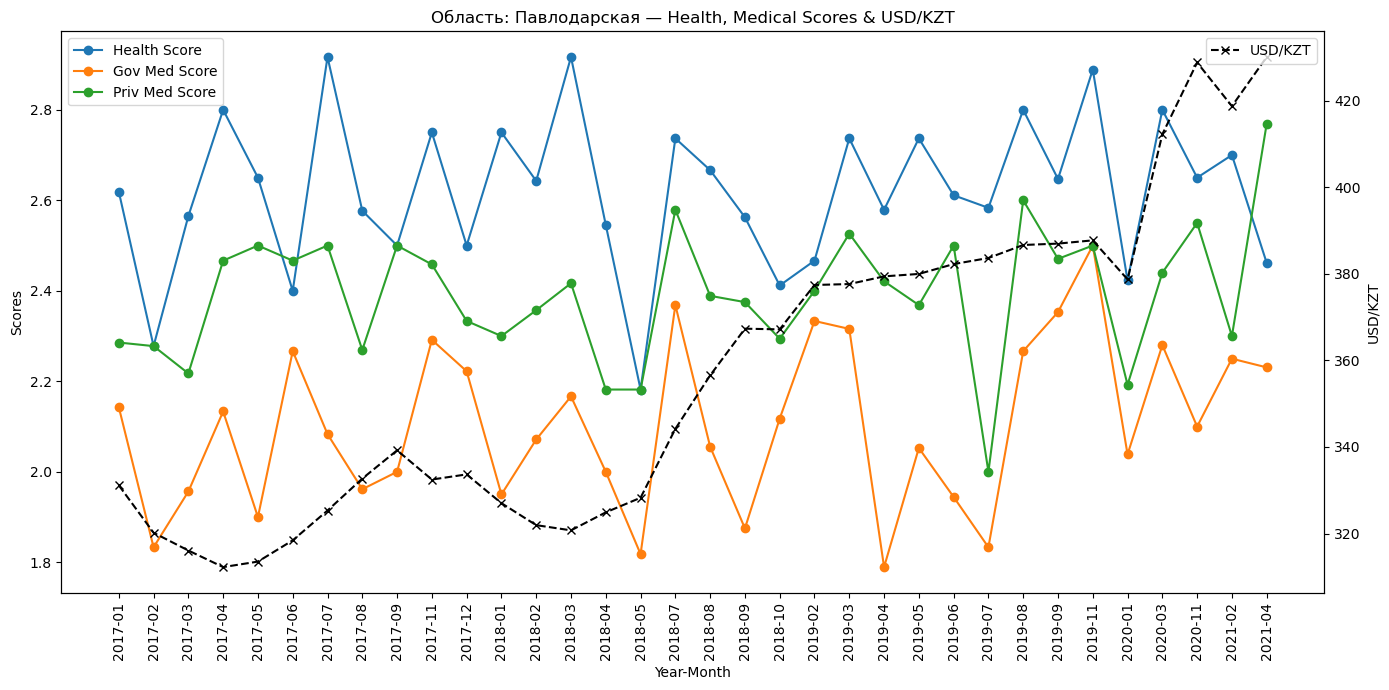

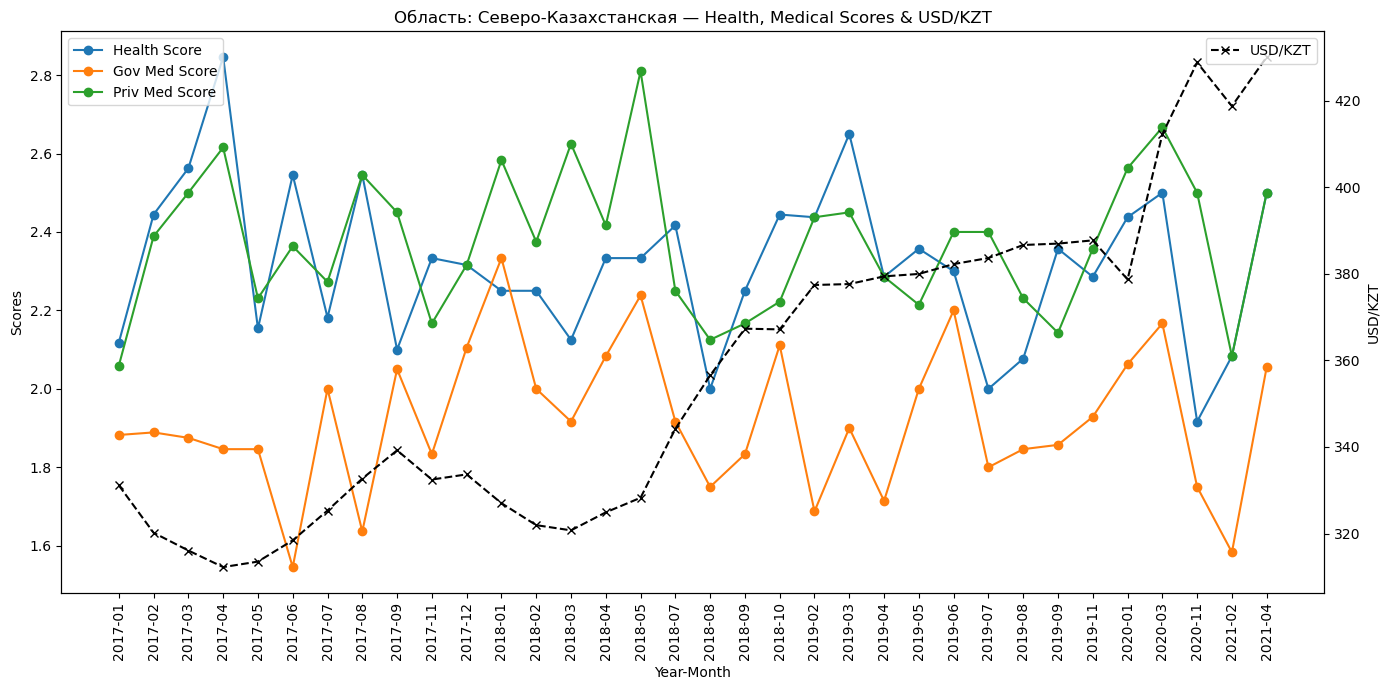

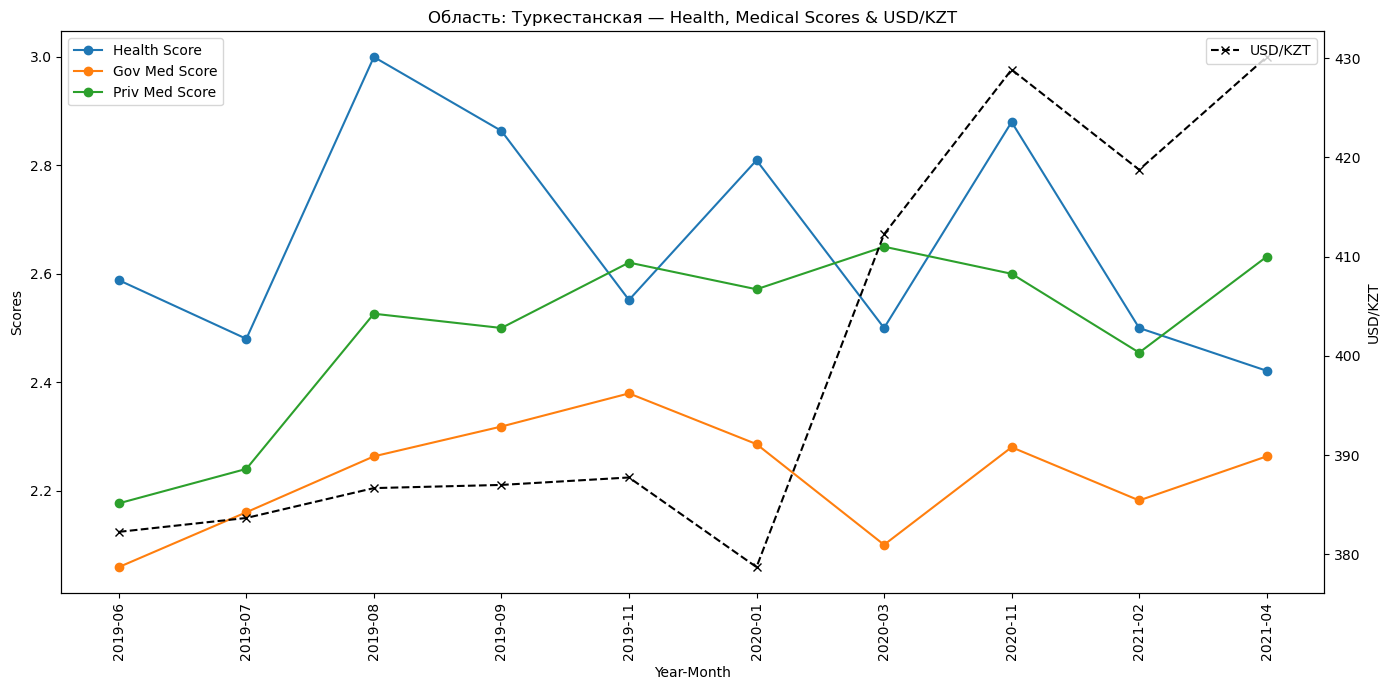

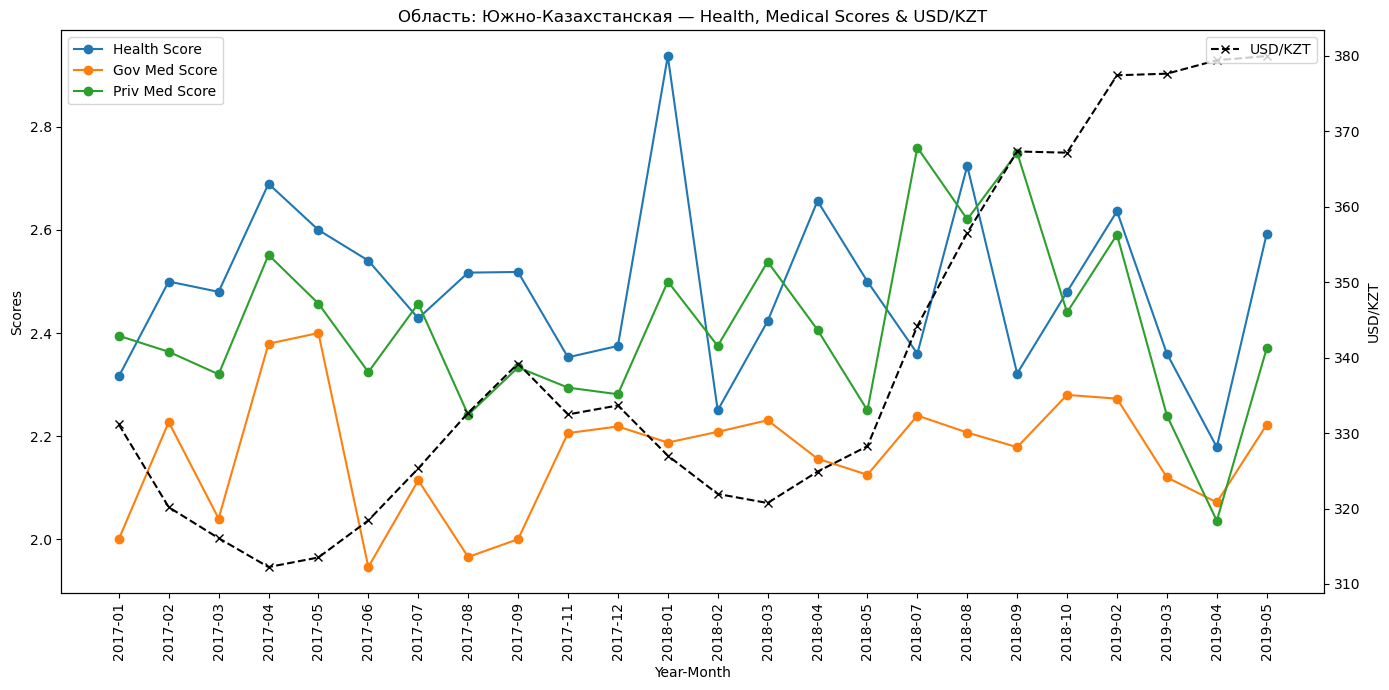

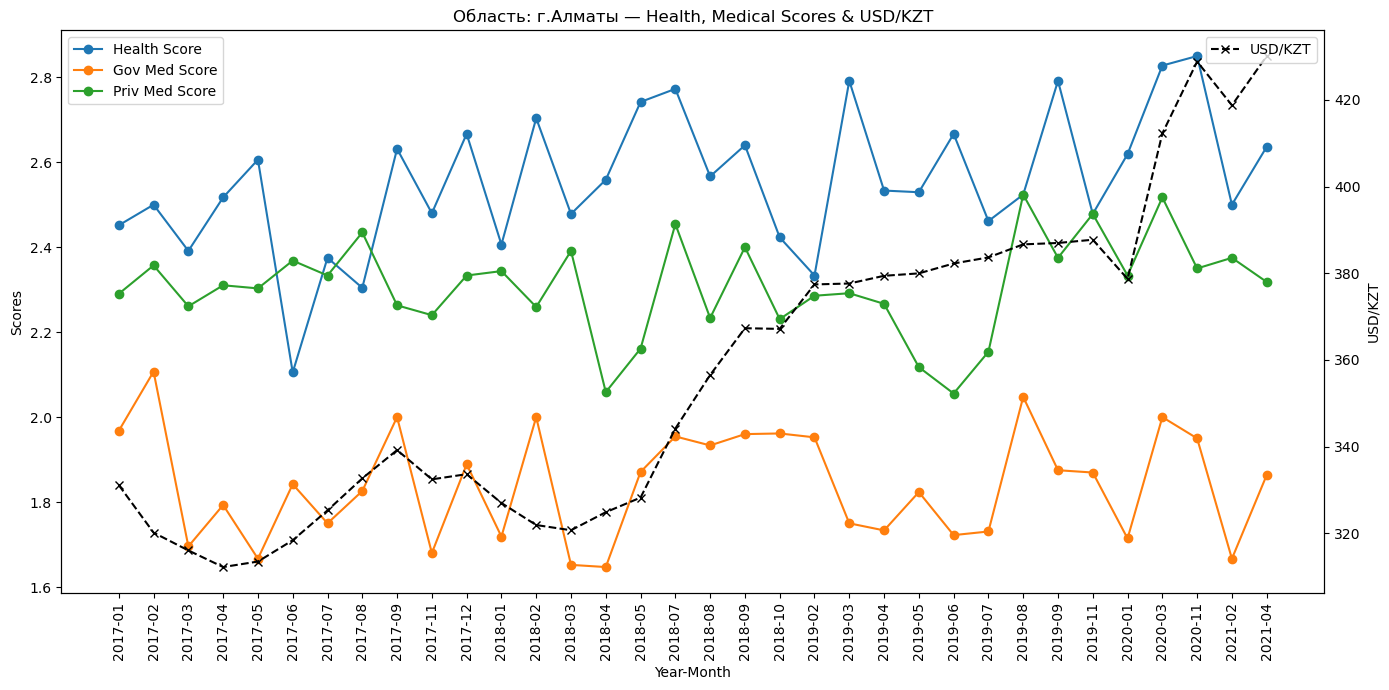

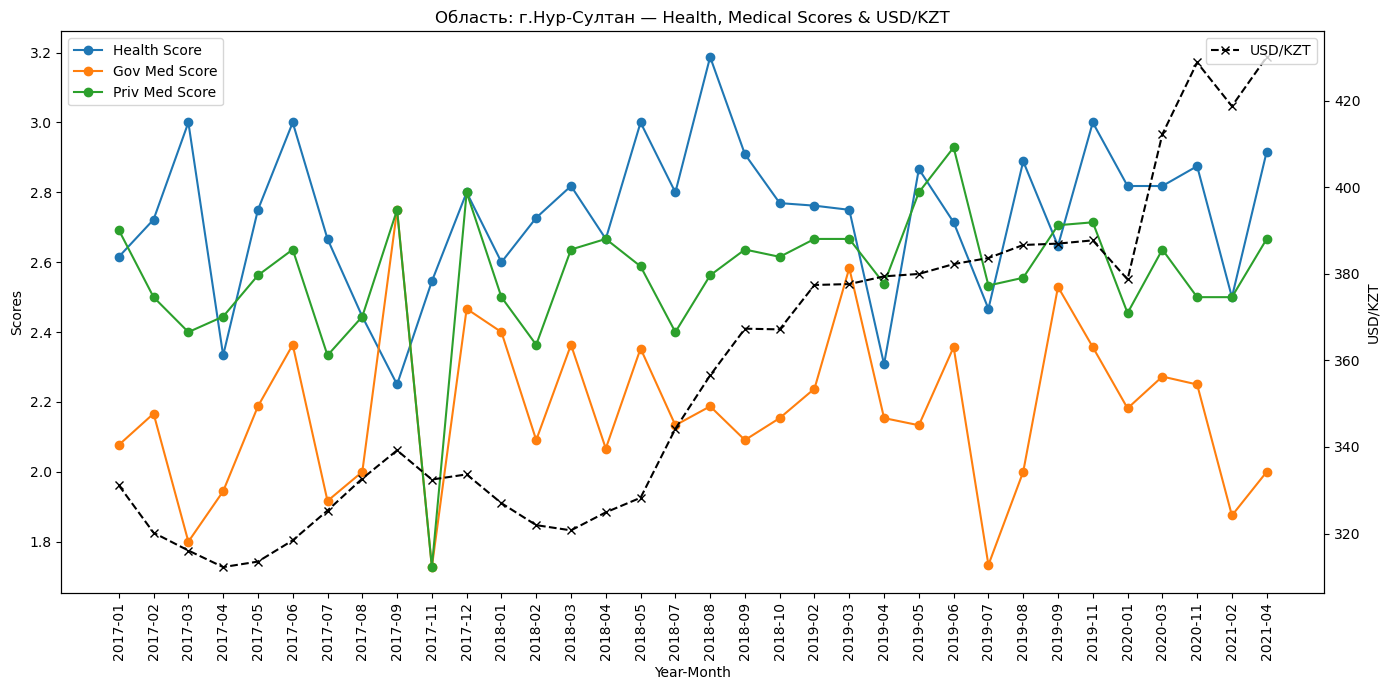

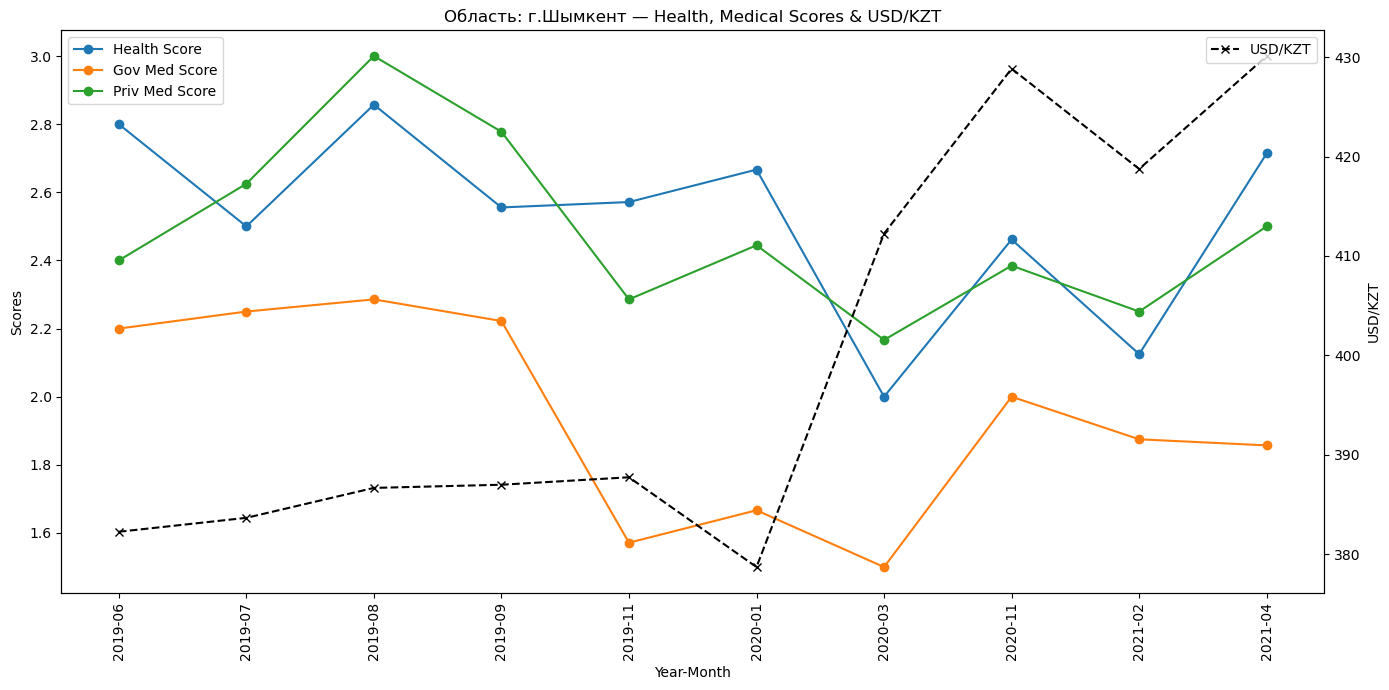

In [9]:
usd_df.columns = usd_df.columns.str.strip()
usd_long = usd_df.melt(
    id_vars=['Год'],
    value_vars=['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь',
                'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь'],
    var_name='month', value_name='USD_KZT'
)
month_map = {'Январь':1,'Февраль':2,'Март':3,'Апрель':4,'Май':5,'Июнь':6,
             'Июль':7,'Август':8,'Сентябрь':9,'Октябрь':10,'Ноябрь':11,'Декабрь':12}
usd_long['month_num'] = usd_long['month'].map(month_map)
usd_long['year_month'] = usd_long.apply(lambda x: f"{int(x['Год'])}-{int(x['month_num']):02d}", axis=1)
usd_long['USD_KZT'] = usd_long['USD_KZT'].astype(str).str.replace(',', '.').astype(float)
usd_long = usd_long[['year_month', 'USD_KZT']].sort_values('year_month').reset_index(drop=True)

if pd.api.types.is_datetime64_any_dtype(survey_df['Год']):
    survey_df['Год'] = survey_df['Год'].dt.year
else:
    survey_df['Год'] = survey_df['Год'].astype(int)
survey_df['Месяц'] = survey_df['Месяц'].astype(int)
survey_df['year_month'] = survey_df.apply(lambda x: f"{x['Год']}-{x['Месяц']:02d}", axis=1)

survey_df['health_score'] = survey_df['q10a. В целом как бы Вы оценили свое здоровье в настоящее время?'].map(health_mapping)
survey_df['gov_med_score'] = survey_df['q9.1. Оцените, пожалуйста, качество медицинских услуг в государственных медицинских учреждениях (поликлиники, больницы) в Казахстане'].map(gov_med_mapping)
survey_df['priv_med_score'] = survey_df['q9.2. Оцените, пожалуйста, качество медицинских услуг в  частных клиниках в Казахстане'].map(priv_med_mapping)

regions = survey_df['Область'].dropna().unique().tolist()
regions.sort()

for region in regions:
    df_reg = survey_df.loc[survey_df['Область'] == region].copy()
    monthly_scores_regions = (
        df_reg.groupby('year_month')[['health_score','gov_med_score','priv_med_score']]
             .mean()
             .reset_index()
             .sort_values('year_month')
    )
    merged_df = pd.merge(monthly_scores_regions, usd_long, on='year_month', how='inner').sort_values('year_month')
    if merged_df.empty:
        continue

    fig, ax1 = plt.subplots(figsize=(14, 7))

    ax1.plot(merged_df['year_month'], merged_df['health_score'], label='Health Score', marker='o')
    ax1.plot(merged_df['year_month'], merged_df['gov_med_score'], label='Gov Med Score', marker='o')
    ax1.plot(merged_df['year_month'], merged_df['priv_med_score'], label='Priv Med Score', marker='o')
    ax1.set_xlabel('Year-Month')
    ax1.set_ylabel('Scores')
    ax1.tick_params(axis='x', rotation=90)

    ax2 = ax1.twinx()
    ax2.plot(merged_df['year_month'], merged_df['USD_KZT'], label='USD/KZT', color='black', linestyle='--', marker='x')
    ax2.set_ylabel('USD/KZT')

    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.title(f'Область: {region} — Health, Medical Scores & USD/KZT')
    plt.tight_layout()
    plt.show()

## **Part 3: Survey & Inflation**

In [10]:
inflation_df = pd.read_csv("data/inflation.csv")

In [11]:
inflation_df.columns = inflation_df.columns.str.strip()
inflation_long = inflation_df.melt(
    id_vars=['Год'], 
    value_vars=['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 
                'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь'],
    var_name='month', value_name='Inflation,%'
)
month_map = {
    'Январь': 1, 'Февраль': 2, 'Март': 3, 'Апрель': 4, 'Май': 5, 'Июнь': 6,
    'Июль': 7, 'Август': 8, 'Сентябрь': 9, 'Октябрь': 10, 'Ноябрь': 11, 'Декабрь': 12
}
inflation_long['month_num'] = inflation_long['month'].map(month_map)
inflation_long['year_month'] = inflation_long.apply(lambda x: f"{int(x['Год'])}-{x['month_num']:02d}", axis=1)
inflation_long['Inflation,%'] = inflation_long['Inflation,%'].astype(float)
inflation_long = inflation_long[['year_month', 'Inflation,%']]

In [12]:
merged_infl_df = pd.merge(monthly_scores, inflation_long, on='year_month', how='inner').sort_values('year_month')

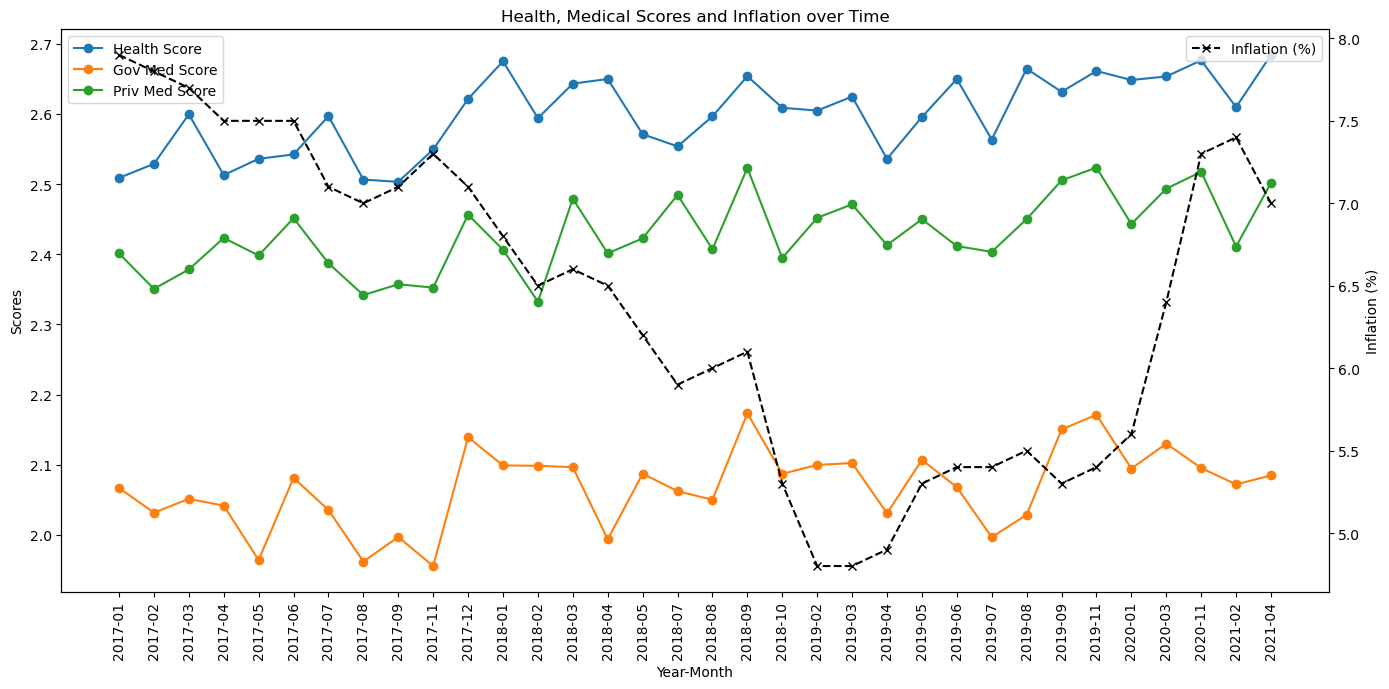

In [13]:
fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.plot(merged_infl_df['year_month'], merged_infl_df['health_score'], label='Health Score', marker='o')
ax1.plot(merged_infl_df['year_month'], merged_infl_df['gov_med_score'], label='Gov Med Score', marker='o')
ax1.plot(merged_infl_df['year_month'], merged_infl_df['priv_med_score'], label='Priv Med Score', marker='o')
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Scores')
ax1.tick_params(axis='x', rotation=90)

ax2 = ax1.twinx()
ax2.plot(merged_infl_df['year_month'], merged_infl_df['Inflation,%'], label='Inflation (%)', color='black', linestyle='--', marker='x')
ax2.set_ylabel('Inflation (%)')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Health, Medical Scores and Inflation over Time')
plt.tight_layout()
plt.show()

### **Part 3.5: Survey & Inflation by Facets**

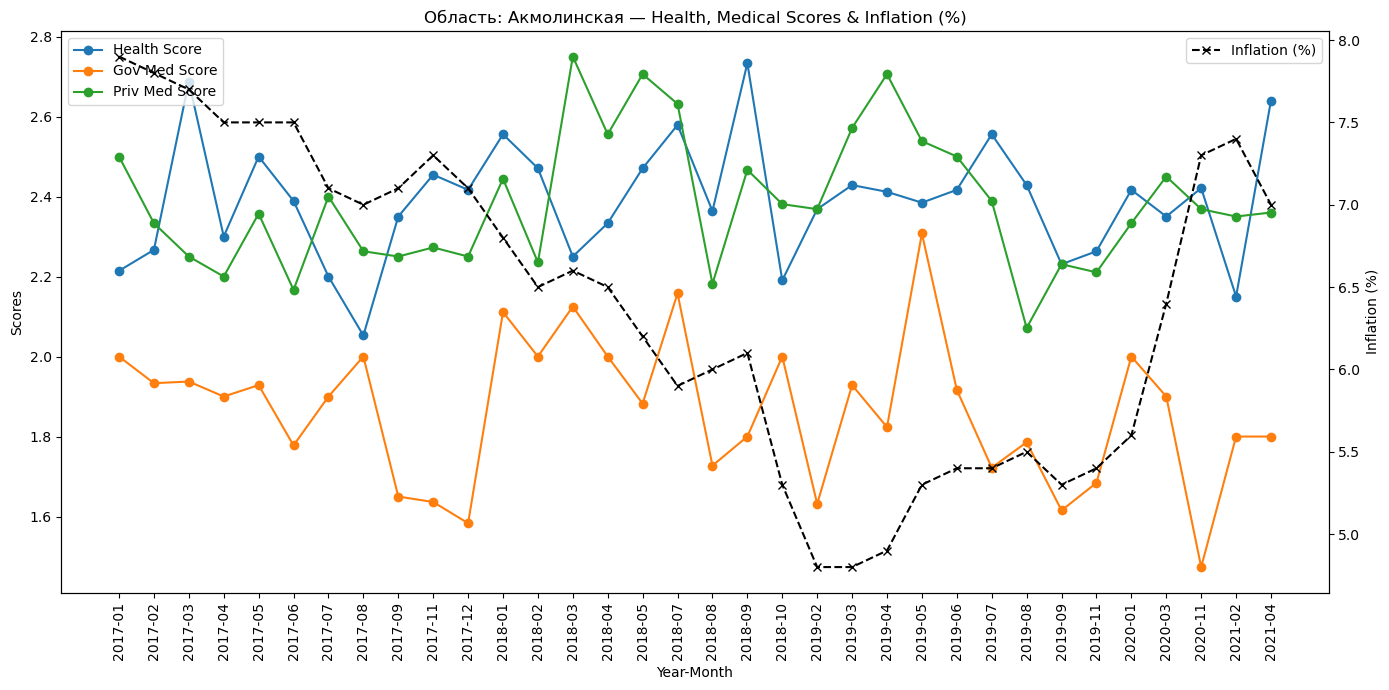

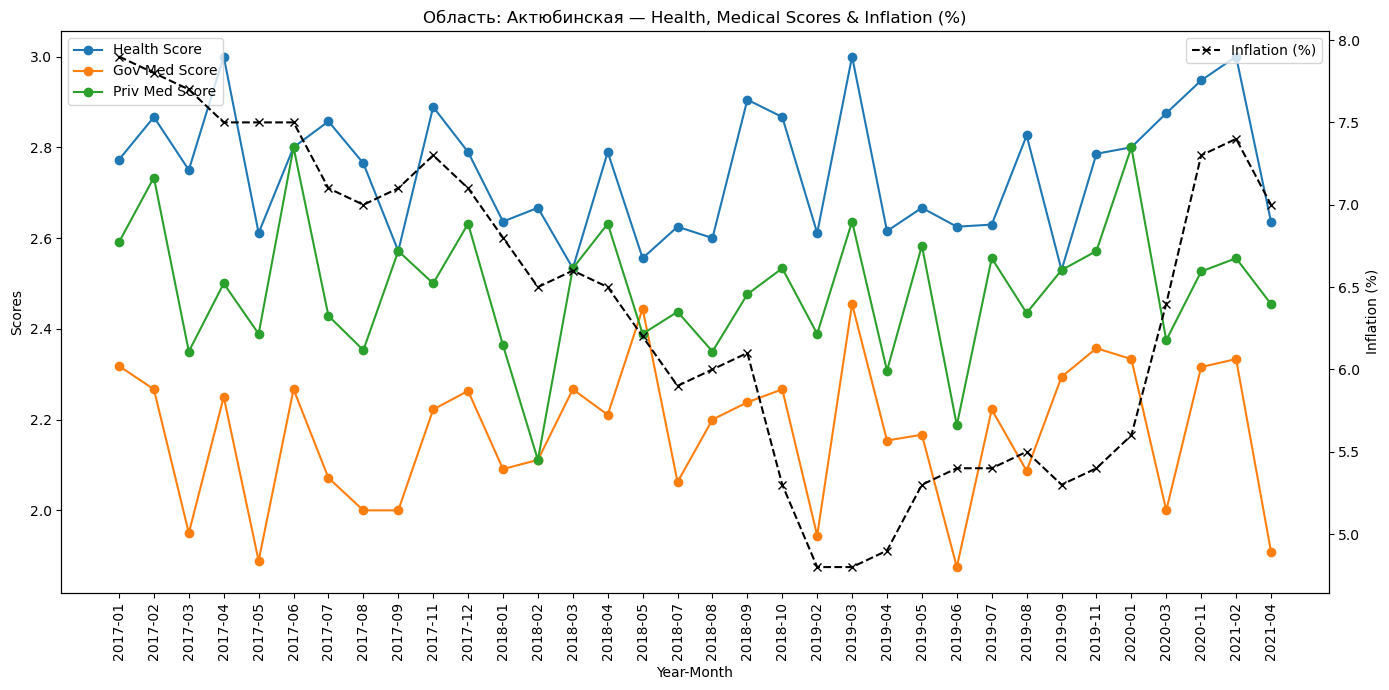

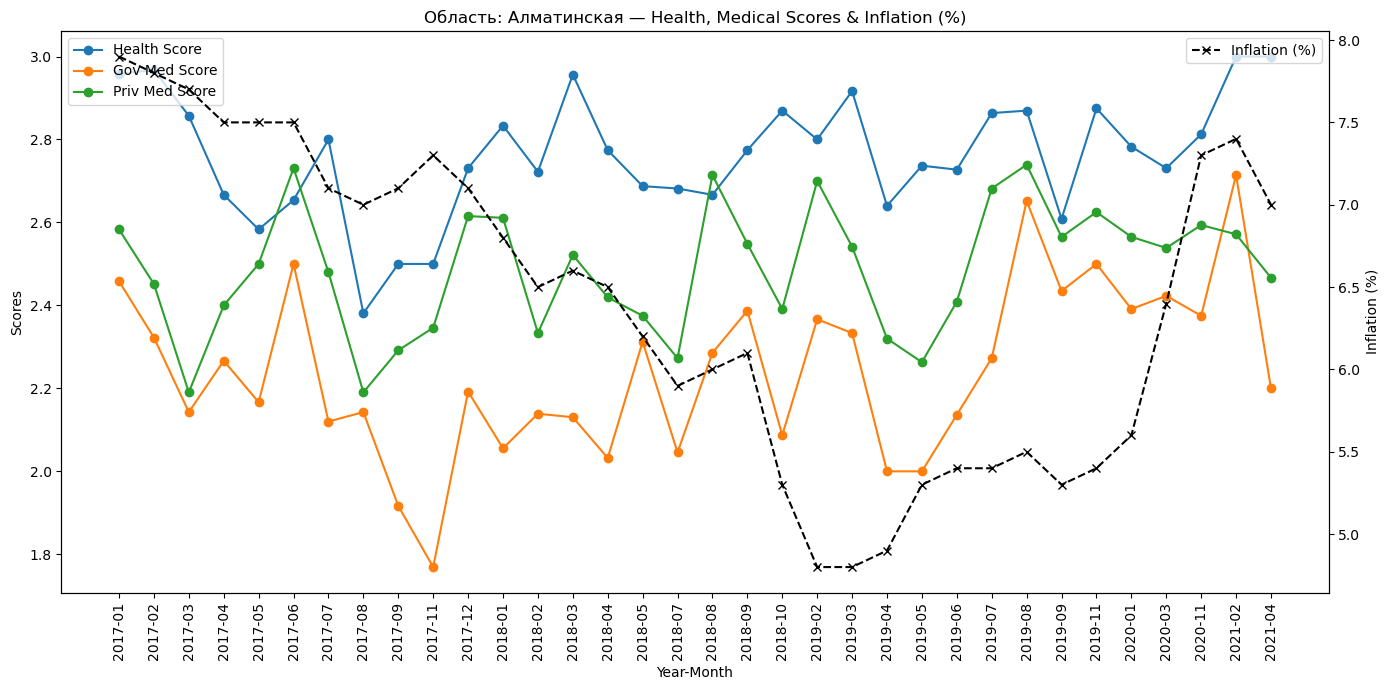

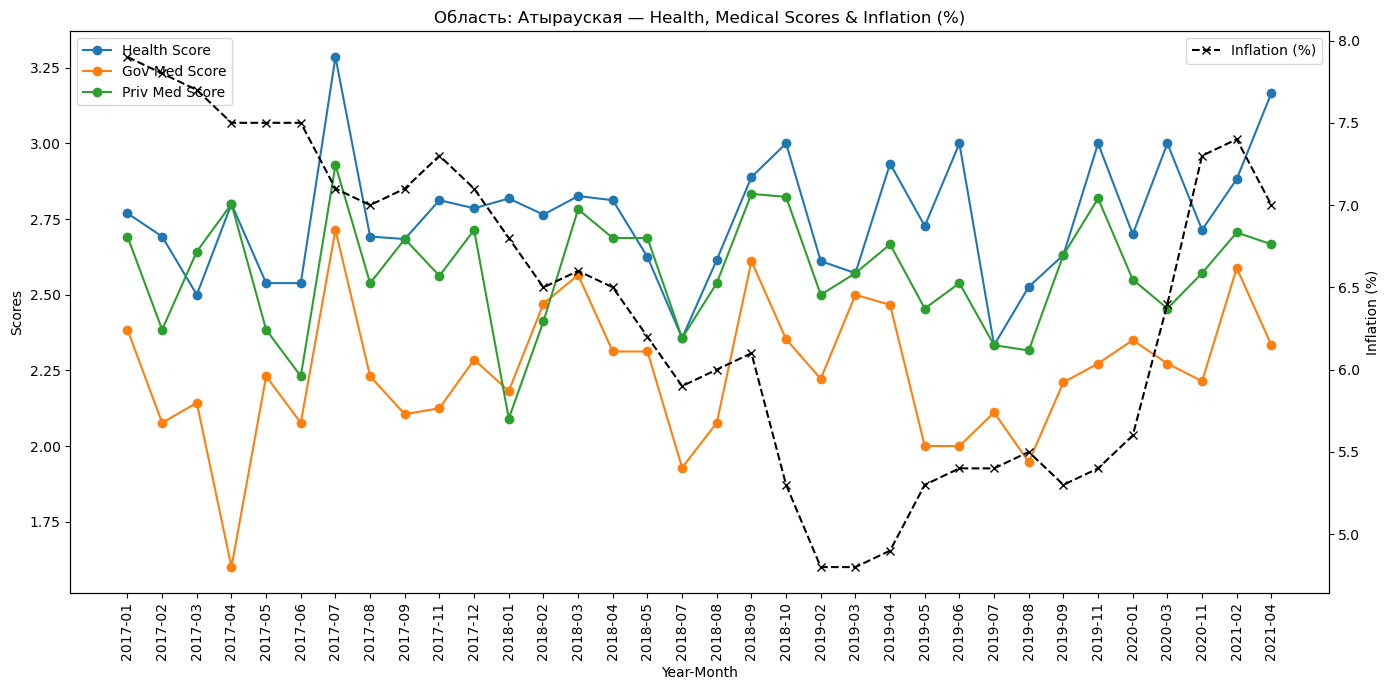

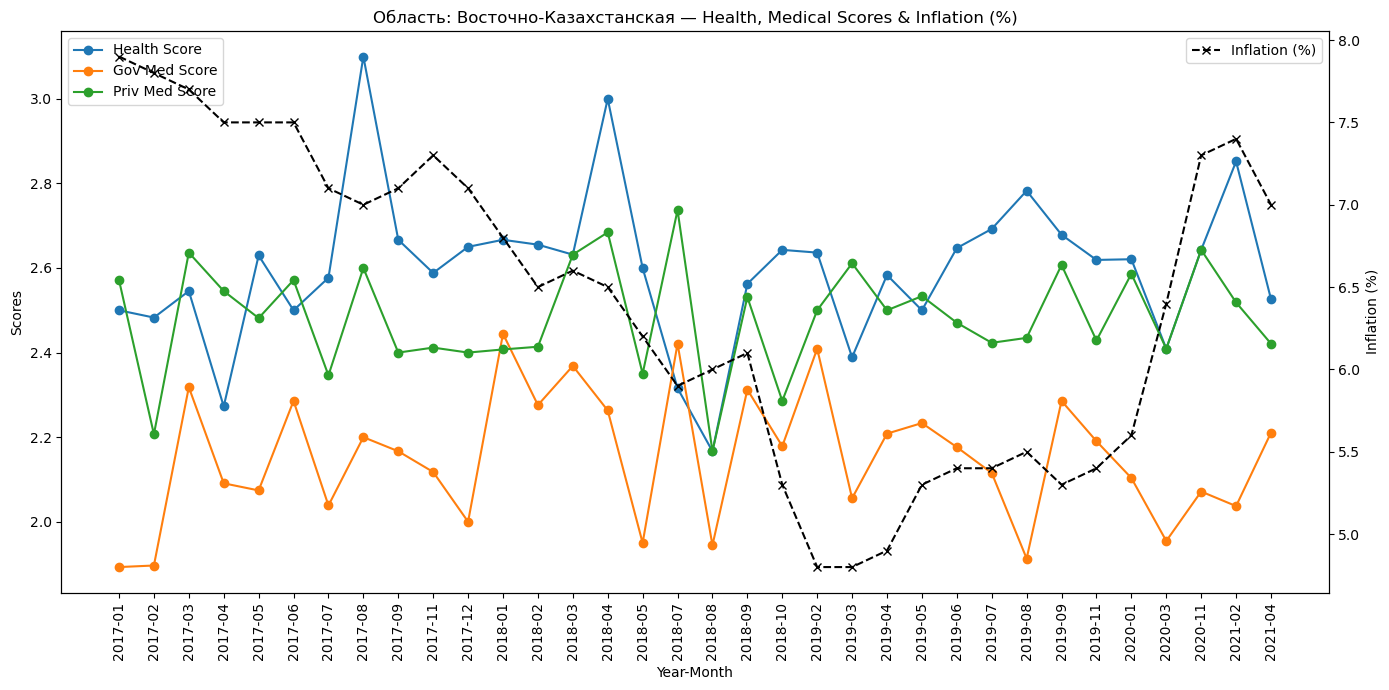

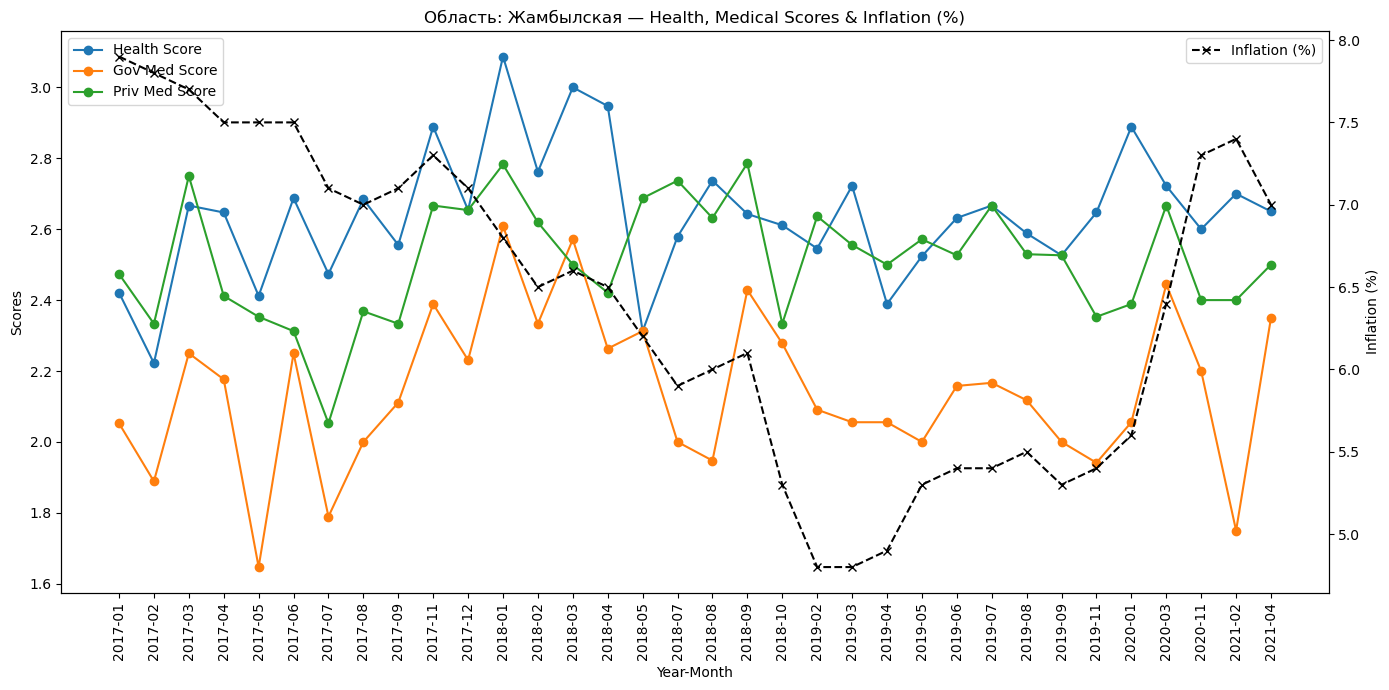

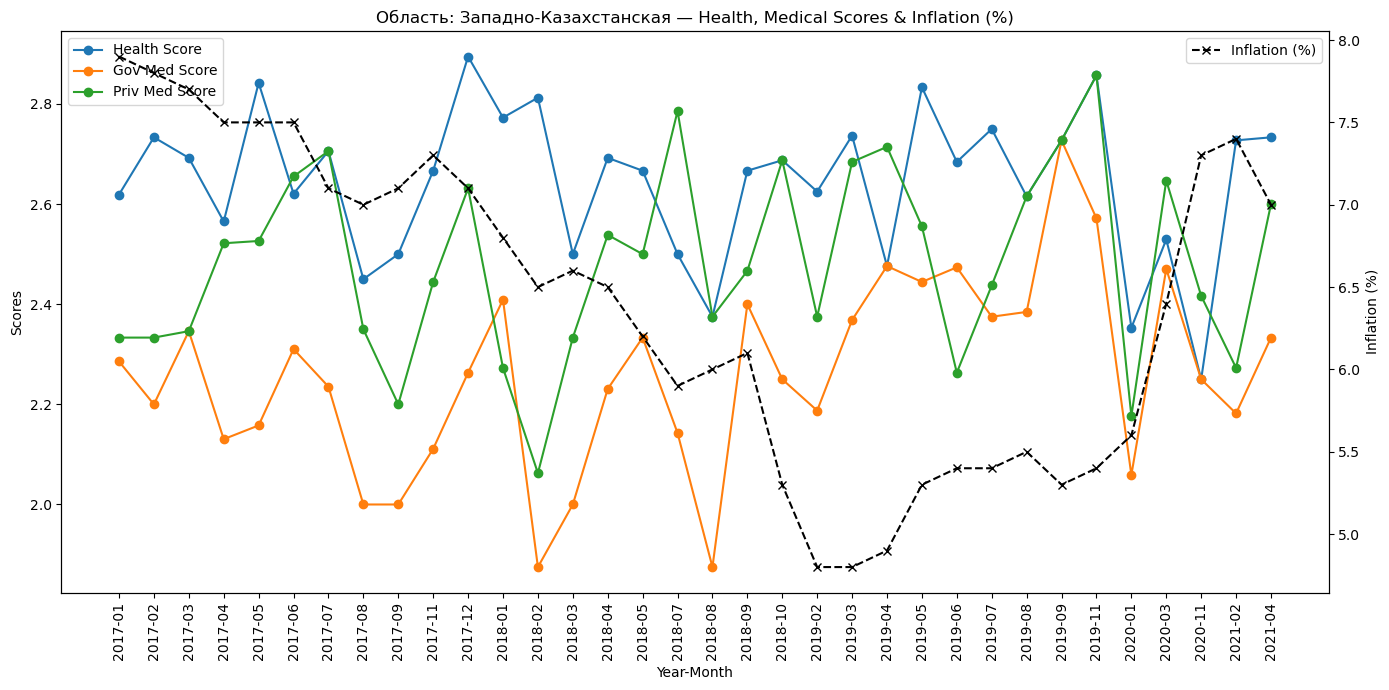

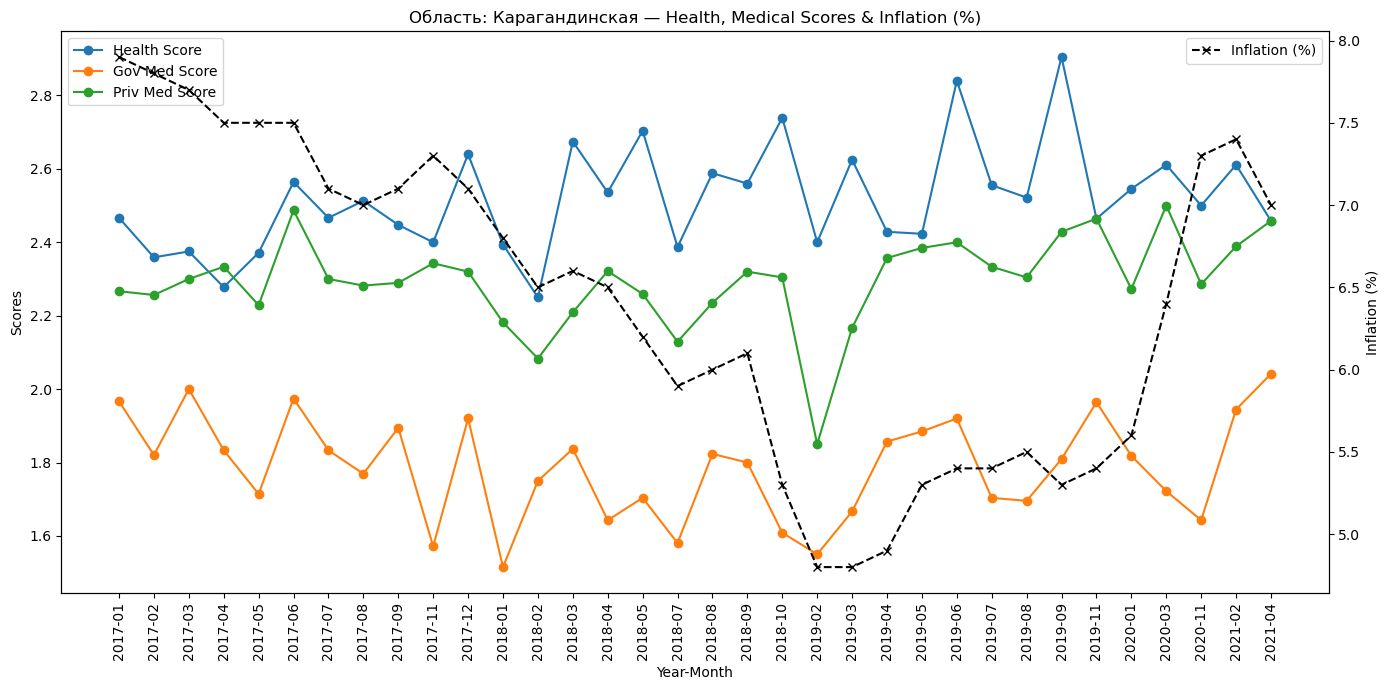

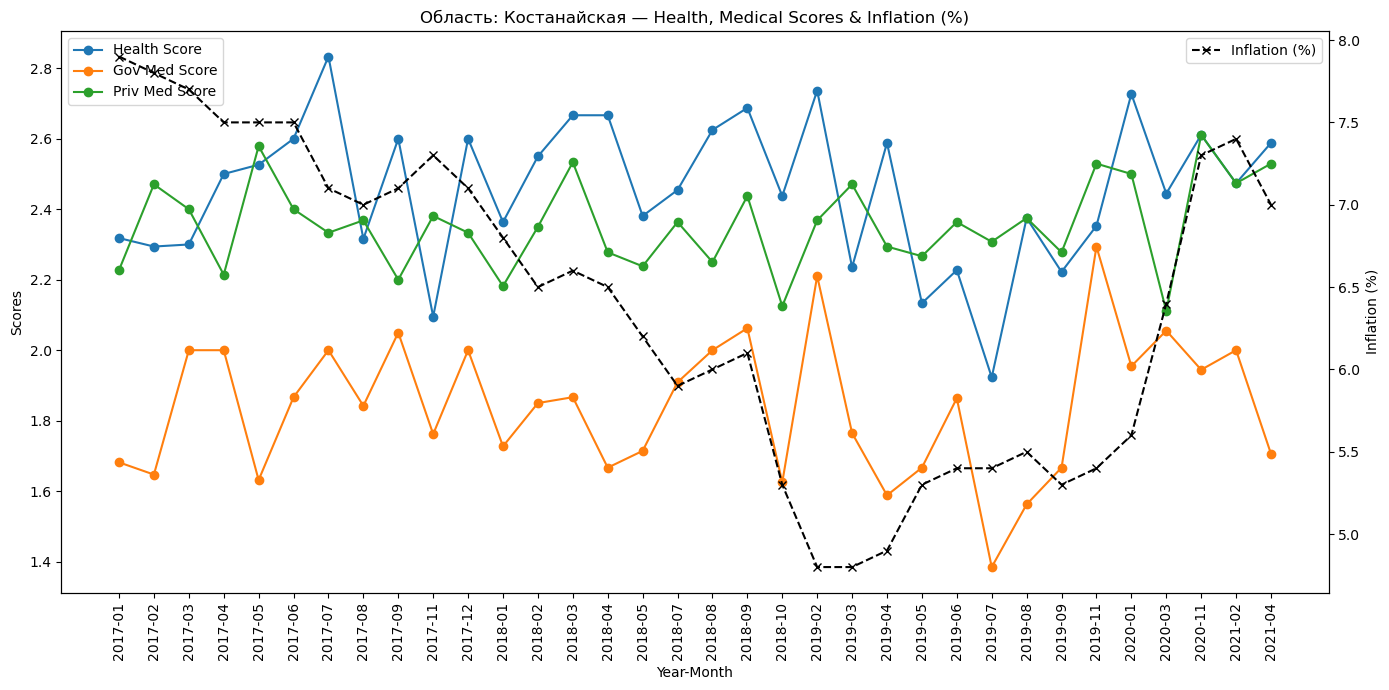

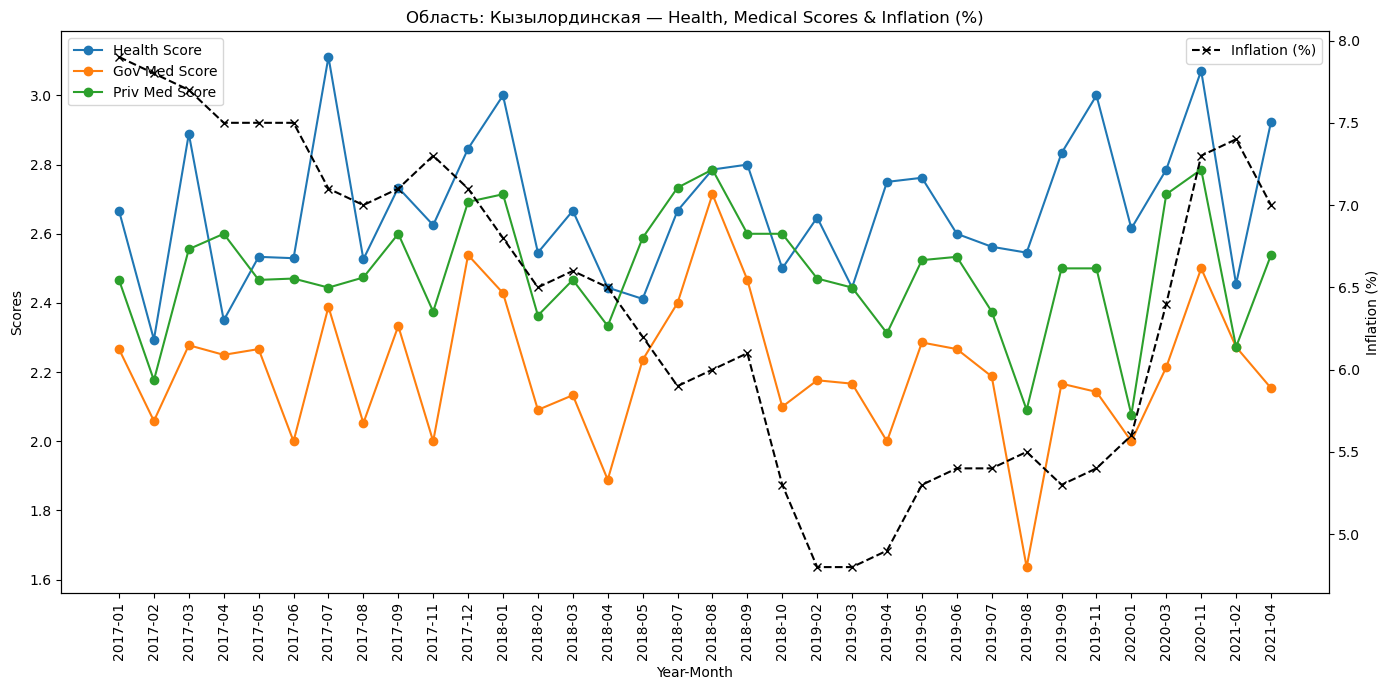

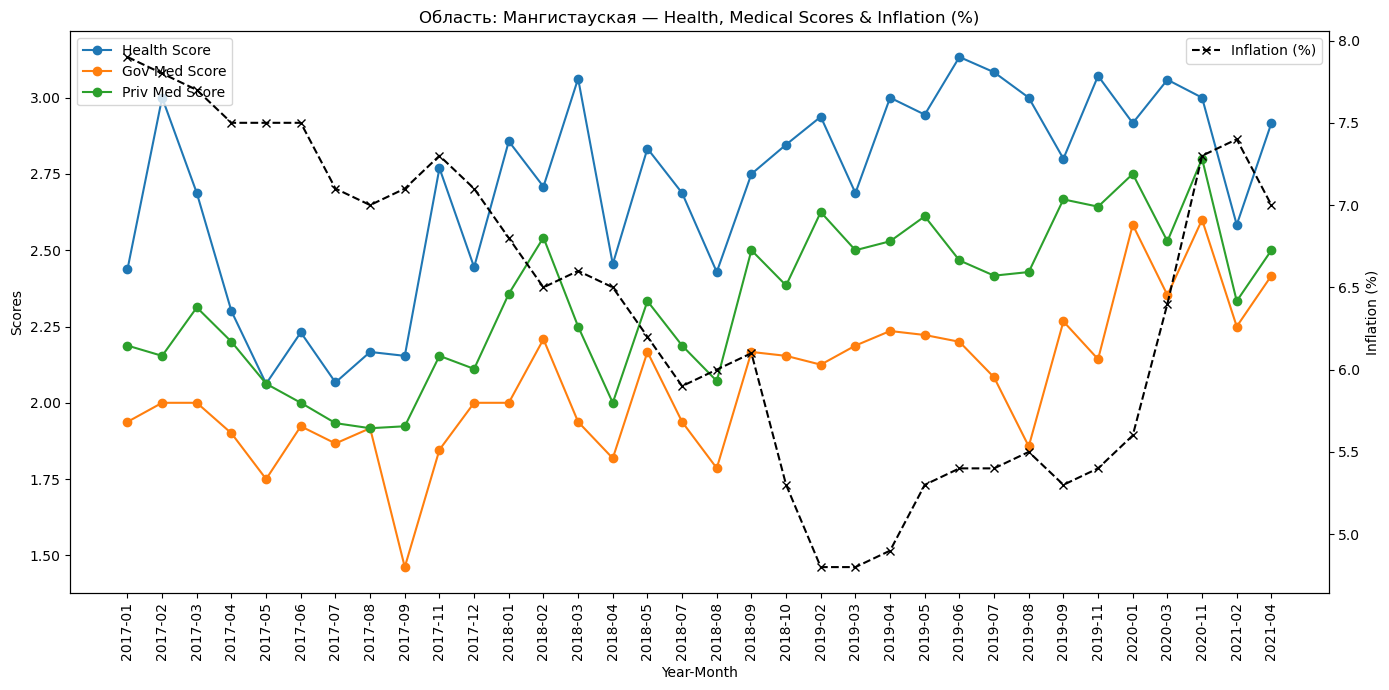

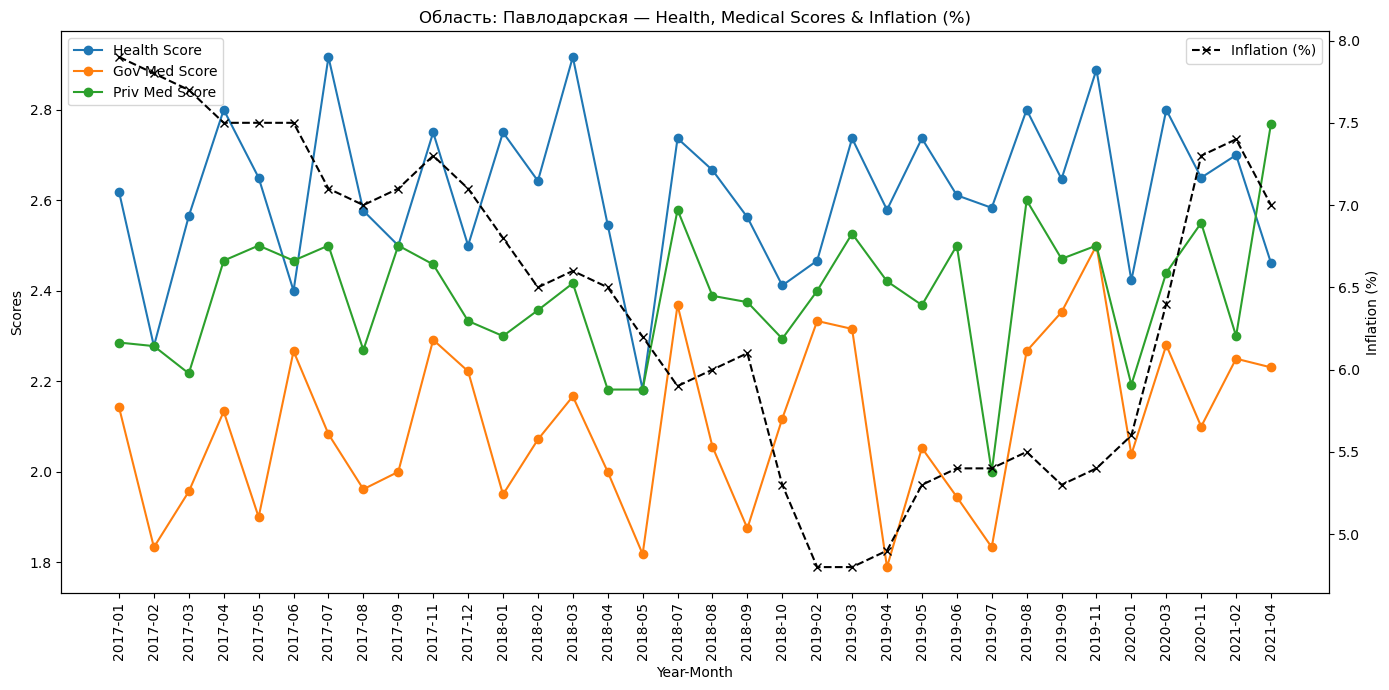

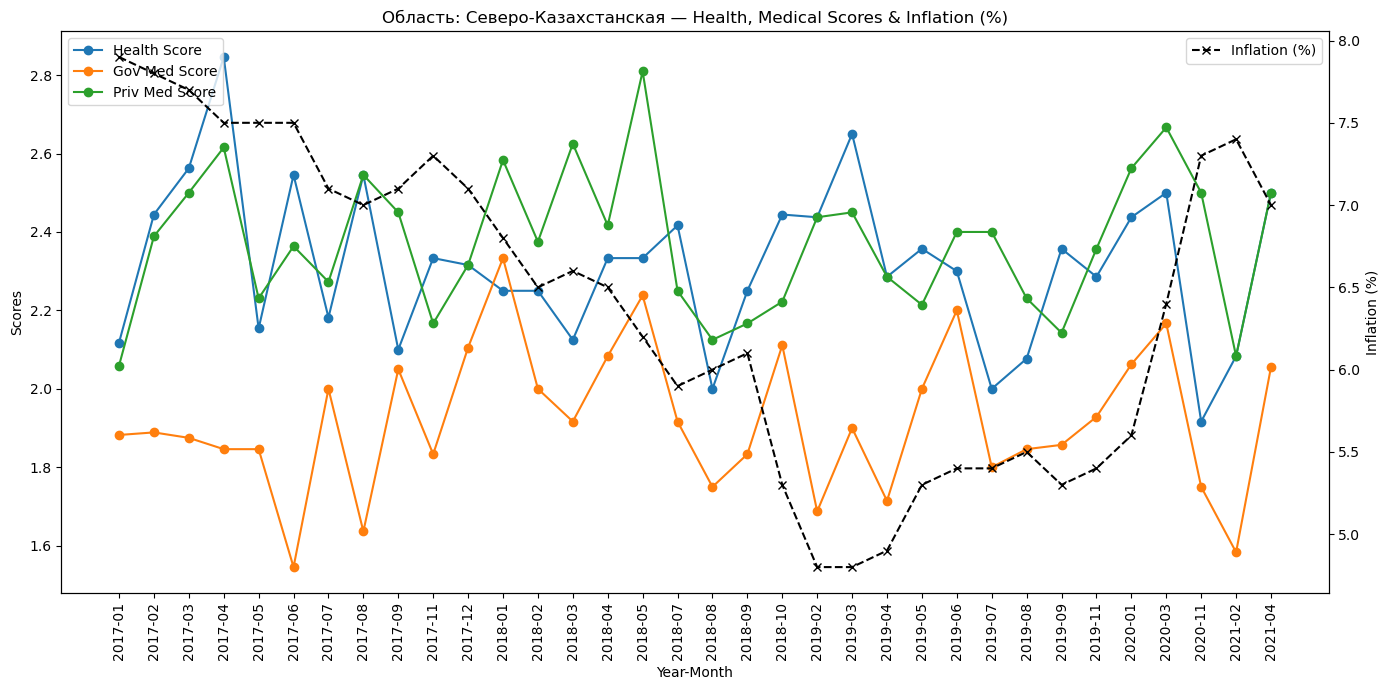

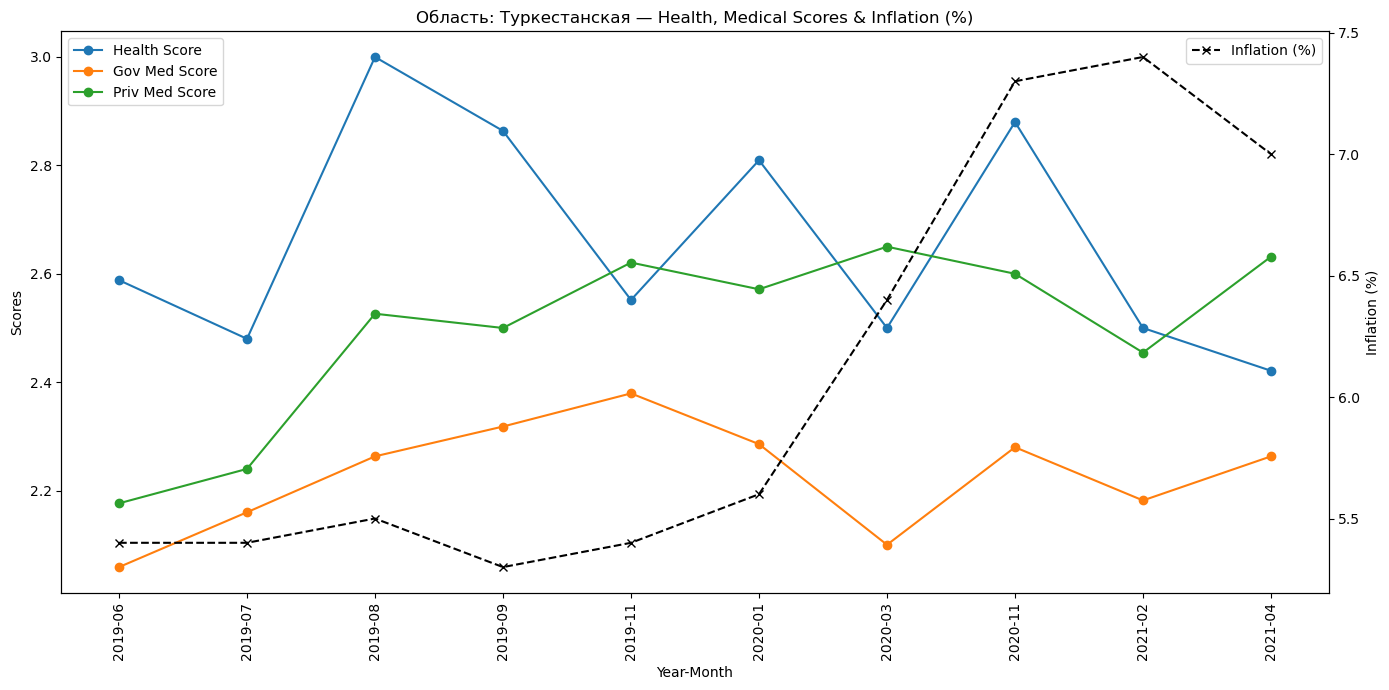

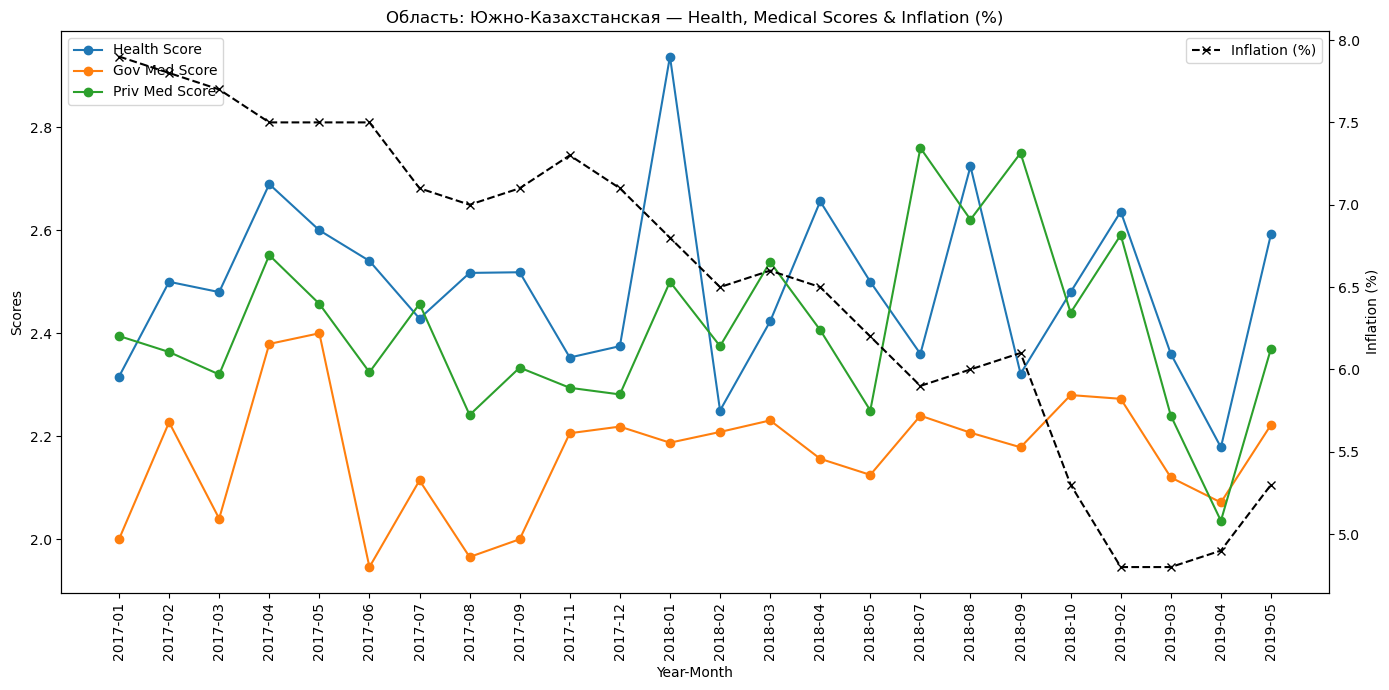

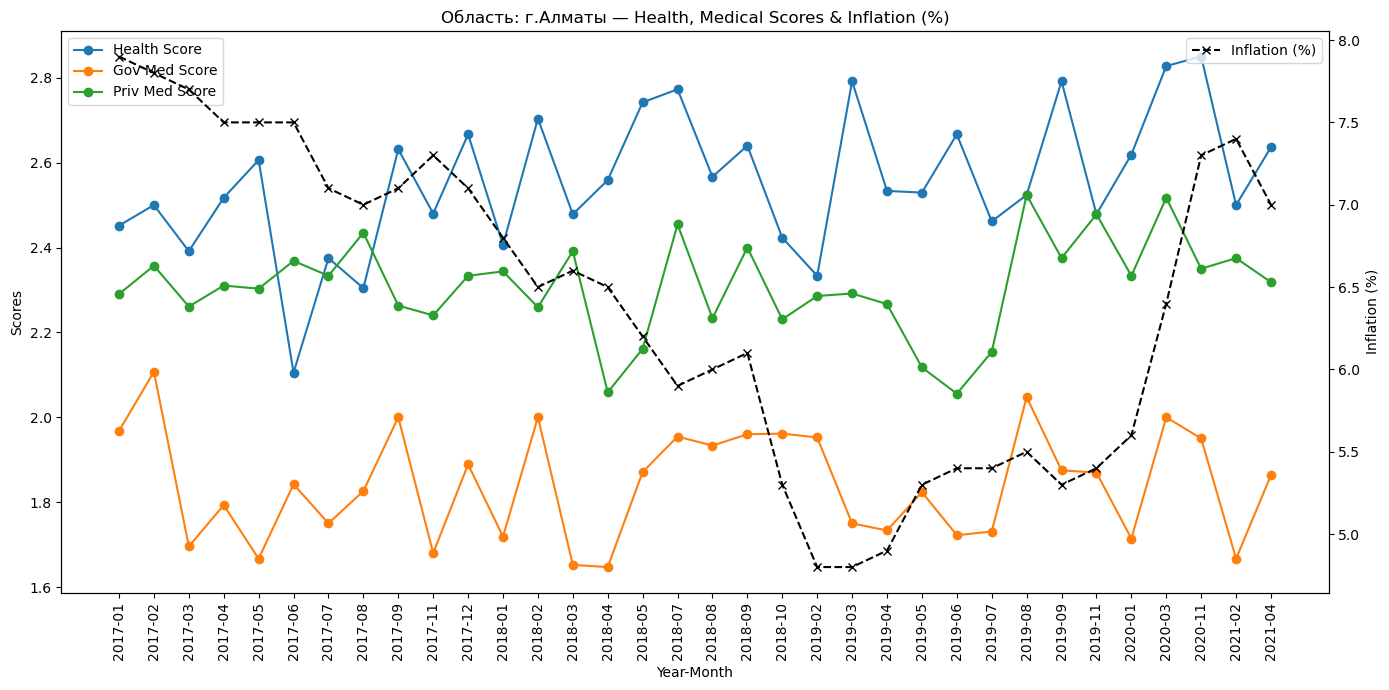

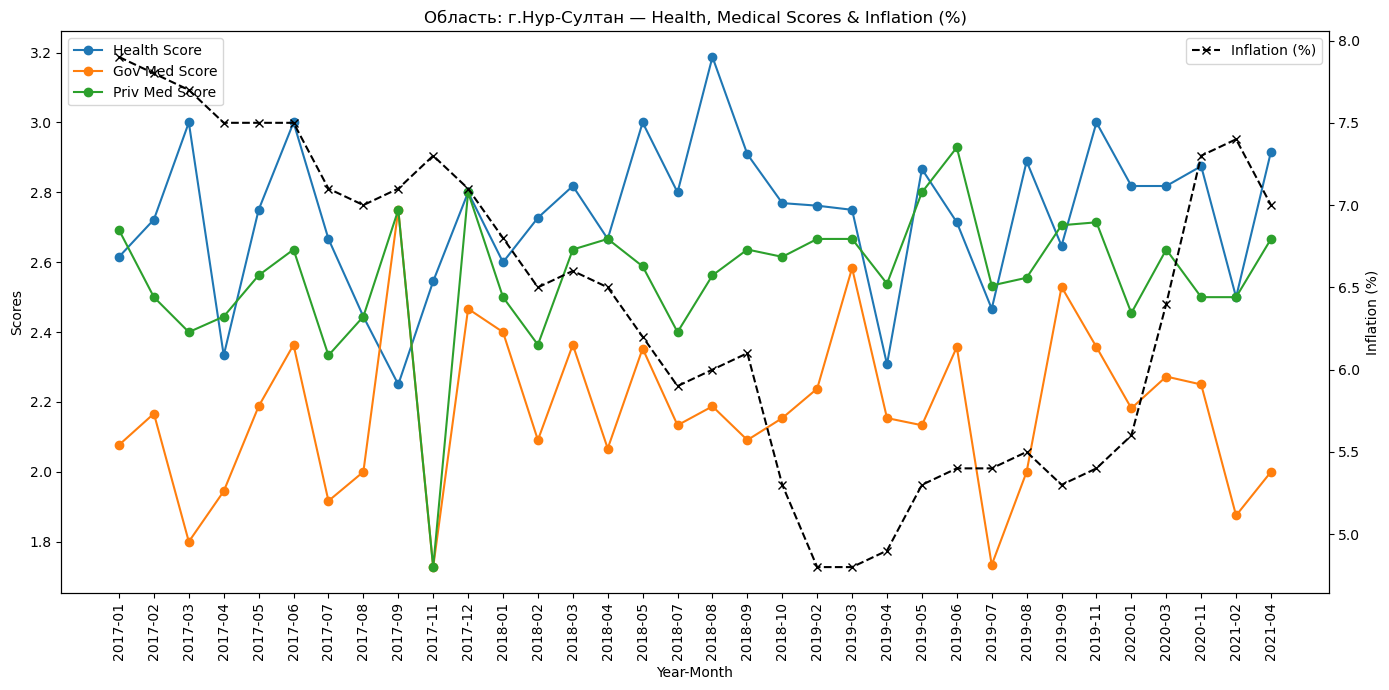

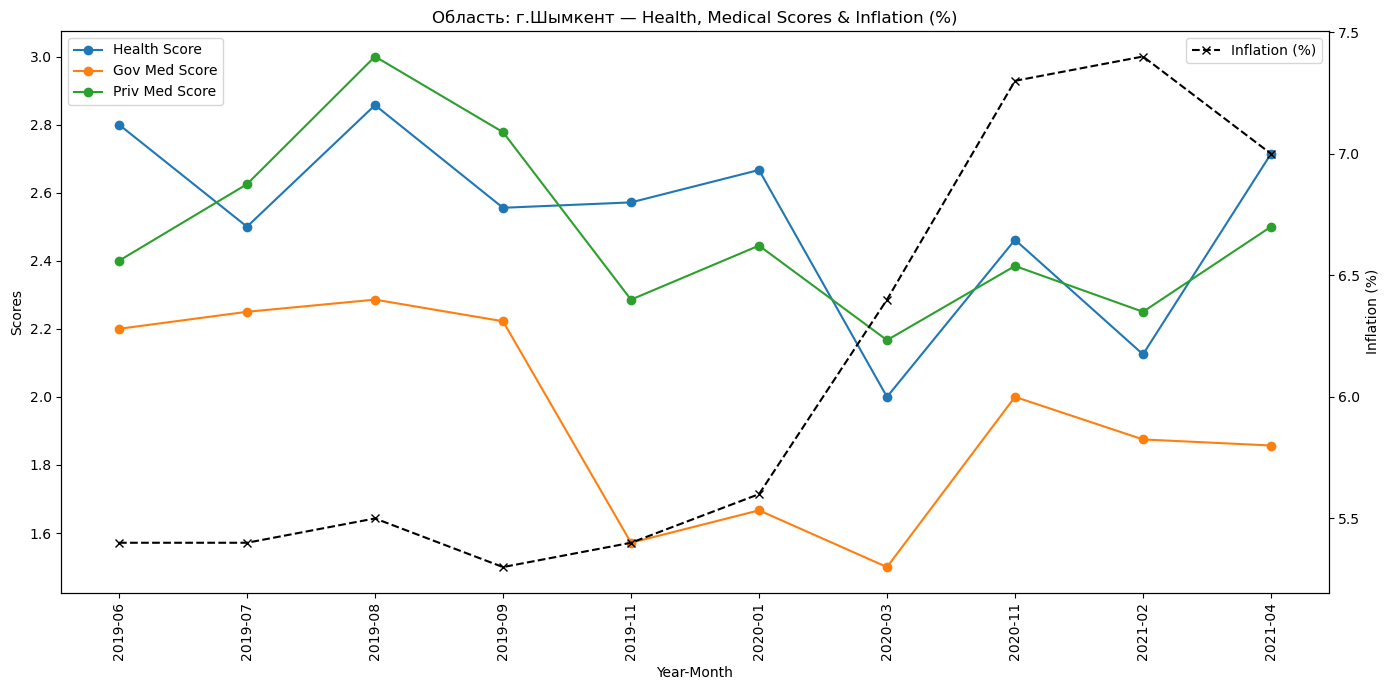

In [14]:
inflation_df.columns = inflation_df.columns.str.strip()
inflation_long = inflation_df.melt(
    id_vars=['Год'],
    value_vars=['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь',
                'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь'],
    var_name='month', value_name='Inflation,%'
)
month_map = {'Январь':1,'Февраль':2,'Март':3,'Апрель':4,'Май':5,'Июнь':6,
             'Июль':7,'Август':8,'Сентябрь':9,'Октябрь':10,'Ноябрь':11,'Декабрь':12}
inflation_long['month_num'] = inflation_long['month'].map(month_map)
inflation_long['year_month'] = inflation_long.apply(lambda x: f"{int(x['Год'])}-{int(x['month_num']):02d}", axis=1)
inflation_long['Inflation,%'] = inflation_long['Inflation,%'].astype(str).str.replace(',', '.').astype(float)
inflation_long = inflation_long[['year_month', 'Inflation,%']].sort_values('year_month').reset_index(drop=True)

if pd.api.types.is_datetime64_any_dtype(survey_df['Год']):
    survey_df['Год'] = survey_df['Год'].dt.year
else:
    survey_df['Год'] = survey_df['Год'].astype(int)
survey_df['Месяц'] = survey_df['Месяц'].astype(int)
survey_df['year_month'] = survey_df.apply(lambda x: f"{x['Год']}-{x['Месяц']:02d}", axis=1)

survey_df['health_score'] = survey_df['q10a. В целом как бы Вы оценили свое здоровье в настоящее время?'].map(health_mapping)
survey_df['gov_med_score'] = survey_df['q9.1. Оцените, пожалуйста, качество медицинских услуг в государственных медицинских учреждениях (поликлиники, больницы) в Казахстане'].map(gov_med_mapping)
survey_df['priv_med_score'] = survey_df['q9.2. Оцените, пожалуйста, качество медицинских услуг в  частных клиниках в Казахстане'].map(priv_med_mapping)

regions = survey_df['Область'].dropna().unique().tolist()
regions.sort()

for region in regions:
    df_reg = survey_df.loc[survey_df['Область'] == region].copy()
    monthly_scores_regions = (
        df_reg.groupby('year_month')[['health_score','gov_med_score','priv_med_score']]
             .mean()
             .reset_index()
             .sort_values('year_month')
    )
    merged_df = pd.merge(monthly_scores_regions, inflation_long, on='year_month', how='inner').sort_values('year_month')
    if merged_df.empty:
        continue

    fig, ax1 = plt.subplots(figsize=(14, 7))

    ax1.plot(merged_df['year_month'], merged_df['health_score'], label='Health Score', marker='o')
    ax1.plot(merged_df['year_month'], merged_df['gov_med_score'], label='Gov Med Score', marker='o')
    ax1.plot(merged_df['year_month'], merged_df['priv_med_score'], label='Priv Med Score', marker='o')
    ax1.set_xlabel('Year-Month')
    ax1.set_ylabel('Scores')
    ax1.tick_params(axis='x', rotation=90)

    ax2 = ax1.twinx()
    ax2.plot(merged_df['year_month'], merged_df['Inflation,%'], label='Inflation (%)', color='black', linestyle='--', marker='x')
    ax2.set_ylabel('Inflation (%)')

    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.title(f'Область: {region} — Health, Medical Scores & Inflation (%)')
    plt.tight_layout()
    plt.show()